<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

A board member of an educational policy team for the state of California has entrusted the nonprofit you work at with a grant of $50,000 to distribute within in the Bay Area or Los Angeles in some way, how so is up to you.  They wish for you to identify the best use of the grant so that it could help foster equity within the developing educational world.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**To-Do:** *Fill out this cell (or edit the above cell) with any other background or information that is necessary for your problem statement.*

### Choose your Data

There are 10 datasets included in the [`data`](./data/) folder for this project. You are required to pick **at least two** of these to complete your analysis. Feel free to use more than two if you would like, or add other relevant datasets you find online.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): 2019 ACT Scores in California by School
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State
* [`sat_2019_by_intended_college_major.csv`](./data/sat_2019_by_intended_college_major.csv): 2019 SAT Scores by Intended College Major
* [`sat_2019_ca.csv`](./data/sat_2019_ca.csv): 2019 SAT Scores in California by School
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges

**To-Do:** *Fill out this cell with the datasets you will use for your analysis. Write a brief description of the contents for each dataset that you choose.*



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/data')

In [3]:
satca2019 = pd.read_csv('sat_2019_ca.csv')

Data on the 2019 SAT in California.

In [4]:
actca2019 = pd.read_csv('act_2019_ca.csv')

Data on the 2019 ACT in California.

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

**To-Do:** *Fill out this cell with outside research or any additional background information that will support your analysis.*


2022 most and least equitable school shit
https://wallethub.com/edu/e/most-least-equitable-school-districts-in-california/77056


In [5]:
equitdist = pd.read_csv('equitabledistrict2022.csv')

2022 List of Counties/Districts in California
https://www.cde.ca.gov/ds/si/ds/pubschls.asp


In [6]:
countydistrict = pd.read_csv('countydistrict.csv')

https://bayareaequityatlas.org/sites/default/files/Final_9_County_BayAreaProfile_0.pdf


In [7]:
bayareacounties = ['Alameda','Contra Costa', 
                   'Marin','Napa','San Francisco', 
                   'San Mateo', 'Santa Clara', 
                   'Solano', 'Sonoma']

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [8]:
# Code: enter a list into numlist, even if it is only one number
def getmean(numlist):
    sum = 0
#     start with 0
    for num in numlist:
        sum += num
#         iterate through numlist and add each number to sum
    return sum/len(numlist)
# return the sum of all the numbers divided by the number of items in number list

print(getmean([5,7,9,6,3,1,2,9]))
print(getmean([67,123,98,12]))
print(getmean([2]))


5.25
75.0
2.0


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [9]:
# Code 
def getstd(listnombre):
    sumt = 0
    for number in listnombre:
        sumt += number
    # print(f'The sum is {sumt}.')
    mew = sumt/len(listnombre)
    # print(f'The average is {mew}.')
    newset=[]
    for i in listnombre:
        # for y in listnombre:
            newset.append((i-mew)**2)
    sigmasum = 0
    for sigmas in newset:
        sigmasum += sigmas
    # print(f'The summation is {sigmasum}')
    insideroot = sigmasum/len(listnombre)
    # print(f'The inside root is {insideroot}')
    stdia = insideroot**0.5
    return f'The standard deviation is {stdia}'
        
    


getstd([4,5,6,7,11,12])

'The standard deviation is 2.9860788111948193'

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [10]:
def strtofloat(percen):
    return float(percen.strip('%'))/100
# strip the percent sign from the input percentage. 
# then use float(input) to convert a string object to a float
# then divide by 100 so you can get a decimal
strtofloat('32.2%')

0.322

In [11]:
def currencytofloat(goodbyemoney):
    goodbyedollar = goodbyemoney.strip('$')
# strip to get rid of dollar sign
    goodbyecomma = goodbyedollar.replace(',','')
# use .replace() method to replace comma with an empty string,
# then you turn the resulting string into a float with float(input)
    return float(goodbyecomma)
currencytofloat('$2,345.34')

2345.34

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [12]:
# Imports:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import re
# import os
# import warnings
# warnings.filterwarnings('ignore')
# Imported earlier so I commented this out

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [13]:
# Code:

In [14]:
satca2019.head()
# checking 5 first rows of dataframe

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [15]:
satca2019.isna().sum()
# checking for null/NaN/missing values within the dataframe

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         276
PctERWBenchmark12         276
NumMathBenchmark12        276
PctMathBenchmark12        276
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         311
PctERWBenchmark11         311
NumMathBenchmark11        311
PctMathBenchmark11        311
TotNumBothBenchmark12     276
PctBothBenchmark12        276
TotNumBothBenchmark11     311
PctBothBenchmark11        311
Year                        1
Unnamed: 25              2580
dtype: int64

In [16]:
satca2019.shape
# to see dimensions of dataframe

(2580, 26)

In [17]:
satca2019.drop(columns= 'Unnamed: 25', inplace =True) 
# deleting column with all missing values first so that when
# .dropna() is used, we don't delete the entire dataset

In [18]:
satca2019.shape

(2580, 25)

In [19]:
satca2019.dropna(inplace=True)
# now that column w empty values is deleted, we can delete the rest
# of the missing values with .dropna() with inplace=True to
# change the original dataframe

In [20]:
satca2019.isna().sum()
# checking for missing/nan values again

CDS                      0
CCode                    0
CDCode                   0
SCode                    0
RType                    0
SName                    0
DName                    0
CName                    0
Enroll12                 0
NumTSTTakr12             0
NumERWBenchmark12        0
PctERWBenchmark12        0
NumMathBenchmark12       0
PctMathBenchmark12       0
Enroll11                 0
NumTSTTakr11             0
NumERWBenchmark11        0
PctERWBenchmark11        0
NumMathBenchmark11       0
PctMathBenchmark11       0
TotNumBothBenchmark12    0
PctBothBenchmark12       0
TotNumBothBenchmark11    0
PctBothBenchmark11       0
Year                     0
dtype: int64

In [21]:
satca2019.shape

(1602, 25)

In [22]:
# now dropping unnecessary columns with meaningless information
satca2019.drop(columns = ['CDS','CCode', 'CDCode', 'SCode', 'RType'], inplace = True)

In [23]:
satca2019.columns
# checking column names to see what we have

Index(['SName', 'DName', 'CName', 'Enroll12', 'NumTSTTakr12',
       'NumERWBenchmark12', 'PctERWBenchmark12', 'NumMathBenchmark12',
       'PctMathBenchmark12', 'Enroll11', 'NumTSTTakr11', 'NumERWBenchmark11',
       'PctERWBenchmark11', 'NumMathBenchmark11', 'PctMathBenchmark11',
       'TotNumBothBenchmark12', 'PctBothBenchmark12', 'TotNumBothBenchmark11',
       'PctBothBenchmark11', 'Year'],
      dtype='object')

In [24]:
satca2019['NumMathBenchmark11'].sort_values(ascending=False)
#using .sort_values() method to see if we have non int/float values
# which we did

667     99
149     99
1128    99
895     99
1126    99
        ..
1627     *
914      *
915      *
917      *
1        *
Name: NumMathBenchmark11, Length: 1602, dtype: object

In [25]:
satca2019.replace('*', np.NaN, inplace = True)
# used .replace() to replace '*' with NaN values

In [26]:
satca2019.isna().sum()
# tallying up the NaN values we had just created 

SName                      0
DName                      0
CName                      0
Enroll12                   0
NumTSTTakr12               0
NumERWBenchmark12        346
PctERWBenchmark12        346
NumMathBenchmark12       346
PctMathBenchmark12       346
Enroll11                   0
NumTSTTakr11               0
NumERWBenchmark11        336
PctERWBenchmark11        336
NumMathBenchmark11       336
PctMathBenchmark11       336
TotNumBothBenchmark12    346
PctBothBenchmark12       346
TotNumBothBenchmark11    336
PctBothBenchmark11       336
Year                       0
dtype: int64

In [27]:
satca2019.dropna(inplace=True)
# dropping the NaN values we had previously created to
# replace other characters, like '*'

In [28]:
satca2019.shape

(1199, 20)

In [29]:
satca2019['NumMathBenchmark11'].sort_values(ascending=False)
# checking again because I like to double-check

895     99
667     99
1126    99
1128    99
149     99
        ..
880      1
1641     0
60       0
1078     0
940      0
Name: NumMathBenchmark11, Length: 1199, dtype: object

In [30]:
satca2019.dtypes
# checking datatypes because we will have to convert integer values labeled
# as objects/strings to int/floats

SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12         object
PctERWBenchmark12         object
NumMathBenchmark12        object
PctMathBenchmark12        object
Enroll11                 float64
NumTSTTakr11             float64
NumERWBenchmark11         object
PctERWBenchmark11         object
NumMathBenchmark11        object
PctMathBenchmark11        object
TotNumBothBenchmark12     object
PctBothBenchmark12        object
TotNumBothBenchmark11     object
PctBothBenchmark11        object
Year                      object
dtype: object

In [31]:
satca2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 2 to 2036
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SName                  1199 non-null   object 
 1   DName                  1199 non-null   object 
 2   CName                  1199 non-null   object 
 3   Enroll12               1199 non-null   float64
 4   NumTSTTakr12           1199 non-null   float64
 5   NumERWBenchmark12      1199 non-null   object 
 6   PctERWBenchmark12      1199 non-null   object 
 7   NumMathBenchmark12     1199 non-null   object 
 8   PctMathBenchmark12     1199 non-null   object 
 9   Enroll11               1199 non-null   float64
 10  NumTSTTakr11           1199 non-null   float64
 11  NumERWBenchmark11      1199 non-null   object 
 12  PctERWBenchmark11      1199 non-null   object 
 13  NumMathBenchmark11     1199 non-null   object 
 14  PctMathBenchmark11     1199 non-null   object 
 15  TotN

In [32]:
satca2019_1 = satca2019.copy()
# I just find it good practice to make copies as I am going 
# So I don't have to completely start over

In [33]:
satca2019_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 2 to 2036
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SName                  1199 non-null   object 
 1   DName                  1199 non-null   object 
 2   CName                  1199 non-null   object 
 3   Enroll12               1199 non-null   float64
 4   NumTSTTakr12           1199 non-null   float64
 5   NumERWBenchmark12      1199 non-null   object 
 6   PctERWBenchmark12      1199 non-null   object 
 7   NumMathBenchmark12     1199 non-null   object 
 8   PctMathBenchmark12     1199 non-null   object 
 9   Enroll11               1199 non-null   float64
 10  NumTSTTakr11           1199 non-null   float64
 11  NumERWBenchmark11      1199 non-null   object 
 12  PctERWBenchmark11      1199 non-null   object 
 13  NumMathBenchmark11     1199 non-null   object 
 14  PctMathBenchmark11     1199 non-null   object 
 15  TotN

In [34]:
satca2019_1.columns

Index(['SName', 'DName', 'CName', 'Enroll12', 'NumTSTTakr12',
       'NumERWBenchmark12', 'PctERWBenchmark12', 'NumMathBenchmark12',
       'PctMathBenchmark12', 'Enroll11', 'NumTSTTakr11', 'NumERWBenchmark11',
       'PctERWBenchmark11', 'NumMathBenchmark11', 'PctMathBenchmark11',
       'TotNumBothBenchmark12', 'PctBothBenchmark12', 'TotNumBothBenchmark11',
       'PctBothBenchmark11', 'Year'],
      dtype='object')

In [35]:
satca2019_1.head()

,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,31,30.39,14,13.73,219.0,174.0,42,24.14,12,6.90,14,13.73,11,6.32,2018-19
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,54,47.79,18,15.93,333.0,275.0,97,35.27,37,13.45,18,15.93,35,12.73,2018-19
5,Foshay Learning Center,Los Angeles Unified,Los Angeles,166.0,106.0,68,64.15,36,33.96,187.0,183.0,91,49.73,47,25.68,36,33.96,44,24.04,2018-19
6,Mission Viejo High,Saddleback Valley Unified,Orange,562.0,190.0,161,84.74,138,72.63,503.0,223.0,206,92.38,176,78.92,132,69.47,172,77.13,2018-19
9,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85.0,68.0,17,25.00,6,8.82,79.0,79.0,22,27.85,10,12.66,6,8.82,6,7.59,2018-19


In [36]:
satca2019_1 = satca2019_1.astype({'Enroll12':'int', 'NumTSTTakr12':'int',
       'NumERWBenchmark12':'int', 'PctERWBenchmark12':'float', 'NumMathBenchmark12':'int',
       'PctMathBenchmark12':'float', 'Enroll11':'int', 'NumTSTTakr11':'int', 'NumERWBenchmark11':'int',
       'PctERWBenchmark11':'float', 'NumMathBenchmark11':'int', 'PctMathBenchmark11':'float',
       'TotNumBothBenchmark12':'int', 'PctBothBenchmark12':'float', 'TotNumBothBenchmark11':'int',
       'PctBothBenchmark11':'float'})
# changed datatypes by using a dictionary

In [37]:
satca2019_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 2 to 2036
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SName                  1199 non-null   object 
 1   DName                  1199 non-null   object 
 2   CName                  1199 non-null   object 
 3   Enroll12               1199 non-null   int64  
 4   NumTSTTakr12           1199 non-null   int64  
 5   NumERWBenchmark12      1199 non-null   int64  
 6   PctERWBenchmark12      1199 non-null   float64
 7   NumMathBenchmark12     1199 non-null   int64  
 8   PctMathBenchmark12     1199 non-null   float64
 9   Enroll11               1199 non-null   int64  
 10  NumTSTTakr11           1199 non-null   int64  
 11  NumERWBenchmark11      1199 non-null   int64  
 12  PctERWBenchmark11      1199 non-null   float64
 13  NumMathBenchmark11     1199 non-null   int64  
 14  PctMathBenchmark11     1199 non-null   float64
 15  TotN

In [38]:
satca2019_1.head()

,SName,DName,CName,Enroll12,NumTSTTakr12,NumERWBenchmark12,PctERWBenchmark12,NumMathBenchmark12,PctMathBenchmark12,Enroll11,NumTSTTakr11,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,219,174,42,24.14,12,6.90,14,13.73,11,6.32,2018-19
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,333,275,97,35.27,37,13.45,18,15.93,35,12.73,2018-19
5,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,187,183,91,49.73,47,25.68,36,33.96,44,24.04,2018-19
6,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,503,223,206,92.38,176,78.92,132,69.47,172,77.13,2018-19
9,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,79,79,22,27.85,10,12.66,6,8.82,6,7.59,2018-19


In [39]:
satca2019_2 = satca2019_1.copy()

In [40]:
sat2019dict = {'SName': 'school', 'DName':'district', 'CName':'county', 'Enroll12':'enroll_sr', 'NumTSTTakr12':'num_sr_tstaker',
       'NumERWBenchmark12':'num_sr_erw_bnchmrk', 'PctERWBenchmark12':'pct_sr_erw_bnchmrk', 'NumMathBenchmark12':'num_sr_mth_bnchmrk',
       'PctMathBenchmark12':'pct_sr_mth_bnchmrk', 'Enroll11':'enroll_jr', 'NumTSTTakr11':'num_jr_tstaker', 'NumERWBenchmark11':'num_jr_erw_bnchmrk',
       'PctERWBenchmark11':'pct_jr_erw_bnchmrk', 'NumMathBenchmark11':'num_jr_mth_bnchmrk', 'PctMathBenchmark11':'pct_jr_mth_bnchmrk',
       'TotNumBothBenchmark12':'tot_sr_bth_bnchmrk', 'PctBothBenchmark12':'pct_sr_bth_bnchmrk', 'TotNumBothBenchmark11':'tot_jr_bth_bnchmrk',
       'PctBothBenchmark11':'pct_jr_bth_bnchmrk', 'Year':'year'}
# renaming columns to all lowercase with abbreviations

In [41]:
satca2019_2.rename(columns=sat2019dict,inplace=True)

In [42]:
satca2019_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 2 to 2036
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              1199 non-null   object 
 1   district            1199 non-null   object 
 2   county              1199 non-null   object 
 3   enroll_sr           1199 non-null   int64  
 4   num_sr_tstaker      1199 non-null   int64  
 5   num_sr_erw_bnchmrk  1199 non-null   int64  
 6   pct_sr_erw_bnchmrk  1199 non-null   float64
 7   num_sr_mth_bnchmrk  1199 non-null   int64  
 8   pct_sr_mth_bnchmrk  1199 non-null   float64
 9   enroll_jr           1199 non-null   int64  
 10  num_jr_tstaker      1199 non-null   int64  
 11  num_jr_erw_bnchmrk  1199 non-null   int64  
 12  pct_jr_erw_bnchmrk  1199 non-null   float64
 13  num_jr_mth_bnchmrk  1199 non-null   int64  
 14  pct_jr_mth_bnchmrk  1199 non-null   float64
 15  tot_sr_bth_bnchmrk  1199 non-null   int64  
 16  pct_sr

In [43]:
actca2019.head()
# now doing the same process for act file

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [44]:
actca2019.isna().sum()
# checking for null/NaN values so we can take out

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [45]:
actca2019.drop(columns= 'Unnamed: 17', inplace = True)
# dropped 'Unnamed:17' column as it had 2310 missing values
# and would have deleted everything if we had .dropna first

In [46]:
actca2019.isna().sum()
# checking missing values again after dropping 'Unnamed:17'

CDS             1
CCode           1
CDCode          1
SCode         523
RType           1
SName         581
DName          59
CName           1
Enroll12        1
NumTstTakr      1
AvgScrRead    357
AvgScrEng     357
AvgScrMath    357
AvgScrSci     357
NumGE21       357
PctGE21       357
Year            1
dtype: int64

In [47]:
actca2019.dropna(inplace=True)
# now dropping the rest of the missing values

In [48]:
actca2019.isna().sum()
# checking to see if we have any missing numbers left

CDS           0
CCode         0
CDCode        0
SCode         0
RType         0
SName         0
DName         0
CName         0
Enroll12      0
NumTstTakr    0
AvgScrRead    0
AvgScrEng     0
AvgScrMath    0
AvgScrSci     0
NumGE21       0
PctGE21       0
Year          0
dtype: int64

In [49]:
actca2019.shape

(1437, 17)

In [50]:
actca2019.drop(columns = ['CDS','CCode', 'CDCode', 'SCode', 'RType'], inplace = True)
# dropped columns that don't have relevant information for our analysis

In [51]:
actca2019['AvgScrRead'].sort_values(ascending=False)
# using .sort_values() to see if there are strange characters that we
# need to replace with more NaN so we can .dropna() again

926     32
1006    31
2271    31
1025    31
1760    31
        ..
1887     *
570      *
1884     *
582      *
2307     *
Name: AvgScrRead, Length: 1437, dtype: object

In [52]:
actca2019.replace('*', np.NaN, inplace = True)

In [53]:
actca2019.isna().sum()

SName           0
DName           0
CName           0
Enroll12        0
NumTstTakr      0
AvgScrRead    420
AvgScrEng     420
AvgScrMath    420
AvgScrSci     420
NumGE21       420
PctGE21       420
Year            0
dtype: int64

In [54]:
actca2019.dropna(inplace=True)

In [55]:
actca2019.isna().sum()

SName         0
DName         0
CName         0
Enroll12      0
NumTstTakr    0
AvgScrRead    0
AvgScrEng     0
AvgScrMath    0
AvgScrSci     0
NumGE21       0
PctGE21       0
Year          0
dtype: int64

In [56]:
actca2019.shape

(1017, 12)

In [57]:
actca2019.columns

Index(['SName', 'DName', 'CName', 'Enroll12', 'NumTstTakr', 'AvgScrRead',
       'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21', 'Year'],
      dtype='object')

In [58]:
actca2019['AvgScrSci'].sort_values(ascending=False)
# double checking for unexpected values or nonnumeric characters

1025    31
926     31
1006    30
1992    30
1760    30
        ..
787     14
599     14
967     14
539     13
310     12
Name: AvgScrSci, Length: 1017, dtype: object

In [59]:
actca2019.dtypes

SName          object
DName          object
CName          object
Enroll12      float64
NumTstTakr    float64
AvgScrRead     object
AvgScrEng      object
AvgScrMath     object
AvgScrSci      object
NumGE21        object
PctGE21        object
Year           object
dtype: object

In [60]:
actca2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 3 to 2306
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SName       1017 non-null   object 
 1   DName       1017 non-null   object 
 2   CName       1017 non-null   object 
 3   Enroll12    1017 non-null   float64
 4   NumTstTakr  1017 non-null   float64
 5   AvgScrRead  1017 non-null   object 
 6   AvgScrEng   1017 non-null   object 
 7   AvgScrMath  1017 non-null   object 
 8   AvgScrSci   1017 non-null   object 
 9   NumGE21     1017 non-null   object 
 10  PctGE21     1017 non-null   object 
 11  Year        1017 non-null   object 
dtypes: float64(2), object(10)
memory usage: 103.3+ KB


In [61]:
actca2019_1 = actca2019.copy()

In [62]:
actca2019_1.tail()

,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
2298,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448.0,104.0,25,24,25,24,83,79.81,2018-19
2299,Yosemite High,Yosemite Unified,Madera,135.0,33.0,22,21,22,22,19,57.58,2018-19
2302,Yreka High,Yreka Union High,Siskiyou,138.0,38.0,23,20,21,21,20,52.63,2018-19
2303,Yuba City High,Yuba City Unified,Sutter,394.0,56.0,23,21,22,22,35,62.50,2018-19
2306,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,24,22,22,22,40,65.57,2018-19


In [63]:
actca2019_1.columns

Index(['SName', 'DName', 'CName', 'Enroll12', 'NumTstTakr', 'AvgScrRead',
       'AvgScrEng', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21', 'Year'],
      dtype='object')

In [64]:
actca2019_1 = actca2019_1.astype({'Enroll12': 'int', 'NumTstTakr': 'int', 'AvgScrRead': 'int',
       'AvgScrEng':'int', 'AvgScrMath':'int', 'AvgScrSci':'int', 'NumGE21':'int', 'PctGE21':'float'})
# changing datatypes

In [65]:
actca2019_1.head()

,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year
3,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2018-19
4,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2018-19
5,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,15,15,17,16,3,9.09,2018-19
6,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18,18,18,17,5,31.25,2018-19
13,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29,29,25,25,34,94.44,2018-19


In [66]:
actca2019_2 = actca2019_1.copy()

In [67]:
actdict = {'SName':'school', 'DName':'district', 'CName':'county', 'Enroll12':'enroll_sr', 'NumTstTakr':'num_tstaker', 'AvgScrRead':'avg_read_score',
       'AvgScrEng':'avg_eng_score', 'AvgScrMath':'avg_mth_score', 'AvgScrSci':'avg_sci_score', 'NumGE21':'num_ge21', 'PctGE21':'pct_ge21', 'Year':'year'}
# changing names as to what was specified in the rubric
# all lowercase

In [68]:
actca2019_2.rename(columns=actdict,inplace=True)

In [69]:
actca2019_2.head()

,school,district,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year
3,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2018-19
4,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2018-19
5,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,15,15,17,16,3,9.09,2018-19
6,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18,18,18,17,5,31.25,2018-19
13,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29,29,25,25,34,94.44,2018-19


In [70]:
equitdist.head()
# checking our outside source

,Rank,School District,Score,Expenditure for Public Elementary and Secondary Schools per Pupil,Income by School District
0,914,Vista Del Mar Union,415.60,"$66,708","$123,500"
1,913,Spencer Valley Elementary,357.80,"$66,067","$82,054"
2,912,Woodside Elementary,334.03,"$30,955","$250,000"
3,911,Sausalito Marin City,320.79,"$55,917","$107,220"
4,910,Bolinas-Stinson Union,307.61,"$55,711","$98,092"


In [71]:
equitdist.isna().sum()
# checking for null/missing values

Rank                                                                 0
School District                                                      0
Score                                                                0
Expenditure for Public Elementary and Secondary Schools per Pupil    0
Income by School District                                            0
dtype: int64

In [72]:
equitdist.shape

(914, 5)

In [73]:
equitdist['Expenditure for Public Elementary and Secondary Schools per Pupil'].sort_values(ascending=False)

437     $9,995
691     $9,966
872     $9,946
694     $9,943
216     $9,935
        ...   
119    $10,139
645    $10,112
222    $10,051
764    $10,030
191    $10,021
Name: Expenditure for Public Elementary and Secondary Schools per Pupil, Length: 914, dtype: object

In [74]:
equitdist.dtypes

Rank                                                                   int64
School District                                                       object
Score                                                                float64
Expenditure for Public Elementary and Secondary Schools per Pupil     object
Income by School District                                             object
dtype: object

In [75]:
equitdist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 5 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Rank                                                               914 non-null    int64  
 1   School District                                                    914 non-null    object 
 2   Score                                                              914 non-null    float64
 3   Expenditure for Public Elementary and Secondary Schools per Pupil  914 non-null    object 
 4   Income by School District                                          914 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 35.8+ KB


In [76]:
equitdist_1 = equitdist.copy()

In [77]:
equitdist_1.head()

,Rank,School District,Score,Expenditure for Public Elementary and Secondary Schools per Pupil,Income by School District
0,914,Vista Del Mar Union,415.60,"$66,708","$123,500"
1,913,Spencer Valley Elementary,357.80,"$66,067","$82,054"
2,912,Woodside Elementary,334.03,"$30,955","$250,000"
3,911,Sausalito Marin City,320.79,"$55,917","$107,220"
4,910,Bolinas-Stinson Union,307.61,"$55,711","$98,092"


In [78]:
equitdist_1['Expenditure for Public Elementary and Secondary Schools per Pupil'] = equitdist_1['Expenditure for Public Elementary and Secondary Schools per Pupil'].apply(currencytofloat)
# applied function I had written earlier to 
# convert the Dollar amount string to float


In [79]:
equitdist_1['Income by School District'] = equitdist_1['Income by School District'].apply(currencytofloat)
# applied function I had written earlier to 
# convert the Dollar amount string to float

In [80]:
equitdist_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 5 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Rank                                                               914 non-null    int64  
 1   School District                                                    914 non-null    object 
 2   Score                                                              914 non-null    float64
 3   Expenditure for Public Elementary and Secondary Schools per Pupil  914 non-null    float64
 4   Income by School District                                          914 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 35.8+ KB


In [81]:
equitdist_1.columns

Index(['Rank', 'School District', 'Score',
       'Expenditure for Public Elementary and Secondary Schools per Pupil',
       'Income by School District'],
      dtype='object')

In [82]:
equitdist_1 = equitdist_1.astype({
       'Expenditure for Public Elementary and Secondary Schools per Pupil': 'float',
       'Income by School District':'float'})
# changed the datatype of the columns to floats

In [83]:
equitdist_2 = equitdist_1.copy()

In [84]:
equitdist_2.columns

Index(['Rank', 'School District', 'Score',
       'Expenditure for Public Elementary and Secondary Schools per Pupil',
       'Income by School District'],
      dtype='object')

In [85]:
equitdict = {'Rank': 'ranking', 'School District':'district', 'Score':'score',
       'Expenditure for Public Elementary and Secondary Schools per Pupil':'expenditure_per_student',
       'Income by School District':'income_by_district'}
# renamed columns by creating a dictionary with the new column names

In [86]:
equitdist_2.rename(columns=equitdict,inplace=True)

In [87]:
equitdist_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ranking                  914 non-null    int64  
 1   district                 914 non-null    object 
 2   score                    914 non-null    float64
 3   expenditure_per_student  914 non-null    float64
 4   income_by_district       914 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 35.8+ KB


In [88]:
countydistrict.head()

,County,District
0,Alameda,Alameda County Office of Education
1,Alameda,California School for the Blind (State Special...
2,Alameda,California School for the Deaf-Fremont (State ...
3,Alameda,Alameda Unified
4,Alameda,Albany City Unified


In [89]:
countydistrict.isna().sum()

County      0
District    0
dtype: int64

In [90]:
countydistrict.dtypes

County      object
District    object
dtype: object

In [91]:
countydistrict_1 = countydistrict.copy()

In [92]:
countydistrict_1.columns

Index(['County', 'District'], dtype='object')

In [93]:
county_dict = {'County':'county', 'District':'district'}

In [94]:
countydistrict_1.rename(columns=county_dict, inplace = True)

In [95]:
countydistrict_1.head()

,county,district
0,Alameda,Alameda County Office of Education
1,Alameda,California School for the Blind (State Special...
2,Alameda,California School for the Deaf-Fremont (State ...
3,Alameda,Alameda Unified
4,Alameda,Albany City Unified


In [96]:
countydistrict_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   county    1085 non-null   object
 1   district  1085 non-null   object
dtypes: object(2)
memory usage: 17.1+ KB


In [97]:
satca2019_2

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,enroll_jr,num_jr_tstaker,num_jr_erw_bnchmrk,pct_jr_erw_bnchmrk,num_jr_mth_bnchmrk,pct_jr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,tot_jr_bth_bnchmrk,pct_jr_bth_bnchmrk,year
2,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,219,174,42,24.14,12,6.90,14,13.73,11,6.32,2018-19
3,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,333,275,97,35.27,37,13.45,18,15.93,35,12.73,2018-19
5,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,187,183,91,49.73,47,25.68,36,33.96,44,24.04,2018-19
6,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,503,223,206,92.38,176,78.92,132,69.47,172,77.13,2018-19
9,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,79,79,22,27.85,10,12.66,6,8.82,6,7.59,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,Enterprise High,Shasta Union High,Shasta,302,54,46,85.19,35,64.81,263,42,36,85.71,34,80.95,33,61.11,31,73.81,2018-19
1976,Willits High,Willits Unified,Mendocino,76,18,13,72.22,7,38.89,107,32,20,62.50,15,46.88,6,33.33,12,37.50,2018-19
1979,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1083,543,426,78.45,318,58.56,1048,404,347,85.89,320,79.21,293,53.96,298,73.76,2018-19
1980,Hughson High,Hughson Unified,Stanislaus,150,40,29,72.50,24,60.00,176,72,57,79.17,42,58.33,23,57.50,39,54.17,2018-19


In [98]:
actca2019_2

,school,district,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year
3,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2018-19
4,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2018-19
5,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,15,15,17,16,3,9.09,2018-19
6,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18,18,18,17,5,31.25,2018-19
13,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29,29,25,25,34,94.44,2018-19
...,...,...,...,...,...,...,...,...,...,...,...,...
2298,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448,104,25,24,25,24,83,79.81,2018-19
2299,Yosemite High,Yosemite Unified,Madera,135,33,22,21,22,22,19,57.58,2018-19
2302,Yreka High,Yreka Union High,Siskiyou,138,38,23,20,21,21,20,52.63,2018-19
2303,Yuba City High,Yuba City Unified,Sutter,394,56,23,21,22,22,35,62.50,2018-19


In [99]:
equitdist_2

,ranking,district,score,expenditure_per_student,income_by_district
0,914,Vista Del Mar Union,415.60,66708.0,123500.0
1,913,Spencer Valley Elementary,357.80,66067.0,82054.0
2,912,Woodside Elementary,334.03,30955.0,250000.0
3,911,Sausalito Marin City,320.79,55917.0,107220.0
4,910,Bolinas-Stinson Union,307.61,55711.0,98092.0
...,...,...,...,...,...
909,5,Napa Valley Unified,0.11,11856.0,92144.0
910,4,Shandon Joint Unified,0.11,17158.0,64000.0
911,3,Templeton Unified,0.07,10546.0,99240.0
912,2,Tustin Unified,0.01,11529.0,93958.0


In [100]:
countydistrict_1

,county,district
0,Alameda,Alameda County Office of Education
1,Alameda,California School for the Blind (State Special...
2,Alameda,California School for the Deaf-Fremont (State ...
3,Alameda,Alameda Unified
4,Alameda,Albany City Unified
...,...,...
1080,Yuba,Camptonville Elementary
1081,Yuba,Marysville Joint Unified
1082,Yuba,Plumas Lake Elementary
1083,Yuba,Wheatland


In [101]:
satca2019_3 = satca2019_2.merge(equitdist_2,left_on = satca2019_2['district'] , right_on = equitdist_2['district'], how = 'left')
# merging provided source SAT with outside source 

In [102]:
satca2019_3

,key_0,school,district_x,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,...,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,tot_jr_bth_bnchmrk,pct_jr_bth_bnchmrk,year,ranking,district_y,score,expenditure_per_student,income_by_district
0,Los Angeles Unified,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,...,14,13.73,11,6.32,2018-19,71.0,Los Angeles Unified,4.92,16355.0,64534.0
1,Los Angeles Unified,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,...,18,15.93,35,12.73,2018-19,71.0,Los Angeles Unified,4.92,16355.0,64534.0
2,Los Angeles Unified,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,...,36,33.96,44,24.04,2018-19,71.0,Los Angeles Unified,4.92,16355.0,64534.0
3,Saddleback Valley Unified,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,...,132,69.47,172,77.13,2018-19,134.0,Saddleback Valley Unified,9.49,11164.0,103264.0
4,Los Angeles Unified,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,...,6,8.82,6,7.59,2018-19,71.0,Los Angeles Unified,4.92,16355.0,64534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,Shasta Union High,Enterprise High,Shasta Union High,Shasta,302,54,46,85.19,35,64.81,...,33,61.11,31,73.81,2018-19,526.0,Shasta Union High,37.76,12598.0,58997.0
1195,Willits Unified,Willits High,Willits Unified,Mendocino,76,18,13,72.22,7,38.89,...,6,33.33,12,37.50,2018-19,576.0,Willits Unified,41.82,13132.0,53012.0
1196,Corona-Norco Unified,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1083,543,426,78.45,318,58.56,...,293,53.96,298,73.76,2018-19,130.0,Corona-Norco Unified,9.22,11703.0,100194.0
1197,Hughson Unified,Hughson High,Hughson Unified,Stanislaus,150,40,29,72.50,24,60.00,...,23,57.50,39,54.17,2018-19,296.0,Hughson Unified,20.71,12225.0,74209.0


In [103]:
satca2019_3.isnull().sum()
# checking for and then dropping null values

key_0                       0
school                      0
district_x                  0
county                      0
enroll_sr                   0
num_sr_tstaker              0
num_sr_erw_bnchmrk          0
pct_sr_erw_bnchmrk          0
num_sr_mth_bnchmrk          0
pct_sr_mth_bnchmrk          0
enroll_jr                   0
num_jr_tstaker              0
num_jr_erw_bnchmrk          0
pct_jr_erw_bnchmrk          0
num_jr_mth_bnchmrk          0
pct_jr_mth_bnchmrk          0
tot_sr_bth_bnchmrk          0
pct_sr_bth_bnchmrk          0
tot_jr_bth_bnchmrk          0
pct_jr_bth_bnchmrk          0
year                        0
ranking                    58
district_y                 58
score                      58
expenditure_per_student    58
income_by_district         58
dtype: int64

In [104]:
satca2019_3 = satca2019_3.dropna()

In [105]:
satca2019_3.isnull().sum()

key_0                      0
school                     0
district_x                 0
county                     0
enroll_sr                  0
num_sr_tstaker             0
num_sr_erw_bnchmrk         0
pct_sr_erw_bnchmrk         0
num_sr_mth_bnchmrk         0
pct_sr_mth_bnchmrk         0
enroll_jr                  0
num_jr_tstaker             0
num_jr_erw_bnchmrk         0
pct_jr_erw_bnchmrk         0
num_jr_mth_bnchmrk         0
pct_jr_mth_bnchmrk         0
tot_sr_bth_bnchmrk         0
pct_sr_bth_bnchmrk         0
tot_jr_bth_bnchmrk         0
pct_jr_bth_bnchmrk         0
year                       0
ranking                    0
district_y                 0
score                      0
expenditure_per_student    0
income_by_district         0
dtype: int64

In [106]:
satca2019_3 = satca2019_3.drop(columns= ['key_0','district_y'])
# dropping repetitive columns

In [107]:
satca2019secondict = {'district_x':'district'}
# changed column name using dictionary and .rename() method

In [108]:
satca2019_3.rename(columns=satca2019secondict,inplace=True)

In [109]:
satca2019_3.loc[:,'year']='2019'
# used column indexing to change the contents of an entire column to the year

In [110]:
satca2019_3

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,enroll_jr,...,pct_jr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,tot_jr_bth_bnchmrk,pct_jr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,219,...,6.90,14,13.73,11,6.32,2019,71.0,4.92,16355.0,64534.0
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,333,...,13.45,18,15.93,35,12.73,2019,71.0,4.92,16355.0,64534.0
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,187,...,25.68,36,33.96,44,24.04,2019,71.0,4.92,16355.0,64534.0
3,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,503,...,78.92,132,69.47,172,77.13,2019,134.0,9.49,11164.0,103264.0
4,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,79,...,12.66,6,8.82,6,7.59,2019,71.0,4.92,16355.0,64534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Vista High,Vista Unified,San Diego,545,159,98,61.64,65,40.88,580,...,44.63,55,34.59,50,41.32,2019,85.0,5.25,13241.0,80805.0
1194,Enterprise High,Shasta Union High,Shasta,302,54,46,85.19,35,64.81,263,...,80.95,33,61.11,31,73.81,2019,526.0,37.76,12598.0,58997.0
1195,Willits High,Willits Unified,Mendocino,76,18,13,72.22,7,38.89,107,...,46.88,6,33.33,12,37.50,2019,576.0,41.82,13132.0,53012.0
1196,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1083,543,426,78.45,318,58.56,1048,...,79.21,293,53.96,298,73.76,2019,130.0,9.22,11703.0,100194.0


In [111]:
actca2019_3 = actca2019_2.merge(equitdist_2,left_on = actca2019_2['district'] , right_on = equitdist_2['district'], how = 'left')
# merging outside source with provided ACT source as well

In [112]:
actca2019_3

,key_0,school,district_x,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,district_y,score,expenditure_per_student,income_by_district
0,San Jose Unified,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2018-19,486.0,San Jose Unified,35.13,12931.0,113777.0
1,Los Angeles Unified,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2018-19,71.0,Los Angeles Unified,4.92,16355.0,64534.0
2,SBE - Academia Avance Charter,Academia Avance Charter,SBE - Academia Avance Charter,Los Angeles,65,33,15,15,17,16,3,9.09,2018-19,NaN,NaN,NaN,NaN,NaN
3,Los Angeles Unified,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18,18,18,17,5,31.25,2018-19,71.0,Los Angeles Unified,4.92,16355.0,64534.0
4,William S. Hart Union High,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29,29,25,25,34,94.44,2018-19,226.0,William S. Hart Union High,15.50,11615.0,105540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,Placentia-Yorba Linda Unified,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448,104,25,24,25,24,83,79.81,2018-19,209.0,Placentia-Yorba Linda Unified,13.77,11178.0,106515.0
1013,Yosemite Unified,Yosemite High,Yosemite Unified,Madera,135,33,22,21,22,22,19,57.58,2018-19,326.0,Yosemite Unified,22.91,12296.0,72121.0
1014,Yreka Union High,Yreka High,Yreka Union High,Siskiyou,138,38,23,20,21,21,20,52.63,2018-19,553.0,Yreka Union High,39.43,14445.0,47897.0
1015,Yuba City Unified,Yuba City High,Yuba City Unified,Sutter,394,56,23,21,22,22,35,62.50,2018-19,450.0,Yuba City Unified,32.54,12704.0,62487.0


In [113]:
actca2019_3 = actca2019_3.dropna()

In [114]:
actca2019_3.isnull().sum()
# checking for and dropping missing values

key_0                      0
school                     0
district_x                 0
county                     0
enroll_sr                  0
num_tstaker                0
avg_read_score             0
avg_eng_score              0
avg_mth_score              0
avg_sci_score              0
num_ge21                   0
pct_ge21                   0
year                       0
ranking                    0
district_y                 0
score                      0
expenditure_per_student    0
income_by_district         0
dtype: int64

In [115]:
actca2019_3.shape

(970, 18)

In [116]:
actca2019_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 1016
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   key_0                    970 non-null    object 
 1   school                   970 non-null    object 
 2   district_x               970 non-null    object 
 3   county                   970 non-null    object 
 4   enroll_sr                970 non-null    int64  
 5   num_tstaker              970 non-null    int64  
 6   avg_read_score           970 non-null    int64  
 7   avg_eng_score            970 non-null    int64  
 8   avg_mth_score            970 non-null    int64  
 9   avg_sci_score            970 non-null    int64  
 10  num_ge21                 970 non-null    int64  
 11  pct_ge21                 970 non-null    float64
 12  year                     970 non-null    object 
 13  ranking                  970 non-null    float64
 14  district_y               

In [117]:
actca2019_3 = actca2019_3.drop(columns= ['key_0','district_y'])
# dropping repetitive columns

In [118]:
actca2019secondict = {'district_x':'district'}
# renaming columns

In [119]:
actca2019_3.rename(columns=actca2019secondict,inplace=True)

In [120]:
actca2019_3.loc[:,'year']='2019'
# changing all values in column 'year' to 2019

In [121]:
actca2019_3

,school,district,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district
0,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2019,486.0,35.13,12931.0,113777.0
1,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2019,71.0,4.92,16355.0,64534.0
3,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18,18,18,17,5,31.25,2019,71.0,4.92,16355.0,64534.0
4,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29,29,25,25,34,94.44,2019,226.0,15.50,11615.0,105540.0
5,Acalanes High,Acalanes Union High,Contra Costa,353,99,29,29,28,27,93,93.94,2019,825.0,75.43,15088.0,133600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448,104,25,24,25,24,83,79.81,2019,209.0,13.77,11178.0,106515.0
1013,Yosemite High,Yosemite Unified,Madera,135,33,22,21,22,22,19,57.58,2019,326.0,22.91,12296.0,72121.0
1014,Yreka High,Yreka Union High,Siskiyou,138,38,23,20,21,21,20,52.63,2019,553.0,39.43,14445.0,47897.0
1015,Yuba City High,Yuba City Unified,Sutter,394,56,23,21,22,22,35,62.50,2019,450.0,32.54,12704.0,62487.0


In [122]:
# os.mkdir('/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/cleaned')


In [123]:
# df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)


In [124]:
os.getcwd()

'/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/data'

In [125]:
# '/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/cleaned'
# exporting my rough draft sat and act files and importing them again

In [126]:
satca2019_3.to_csv('/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/cleaned/satca2019_clmer', index=False)

In [127]:
satca2019_clmer = pd.read_csv('/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/cleaned/satca2019_clmer')

In [128]:
actca2019_3.to_csv('/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/cleaned/actca2019_clmer', index=False)

In [129]:
actca2019_clmer = pd.read_csv('/Users/ranyasatkuna/Documents/DSIR 1010/Projects/project_1/cleaned/actca2019_clmer')

In [130]:
satca2019_clmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   1141 non-null   object 
 1   district                 1141 non-null   object 
 2   county                   1141 non-null   object 
 3   enroll_sr                1141 non-null   int64  
 4   num_sr_tstaker           1141 non-null   int64  
 5   num_sr_erw_bnchmrk       1141 non-null   int64  
 6   pct_sr_erw_bnchmrk       1141 non-null   float64
 7   num_sr_mth_bnchmrk       1141 non-null   int64  
 8   pct_sr_mth_bnchmrk       1141 non-null   float64
 9   enroll_jr                1141 non-null   int64  
 10  num_jr_tstaker           1141 non-null   int64  
 11  num_jr_erw_bnchmrk       1141 non-null   int64  
 12  pct_jr_erw_bnchmrk       1141 non-null   float64
 13  num_jr_mth_bnchmrk       1141 non-null   int64  
 14  pct_jr_mth_bnchmrk      

In [131]:
actca2019_clmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   970 non-null    object 
 1   district                 970 non-null    object 
 2   county                   970 non-null    object 
 3   enroll_sr                970 non-null    int64  
 4   num_tstaker              970 non-null    int64  
 5   avg_read_score           970 non-null    int64  
 6   avg_eng_score            970 non-null    int64  
 7   avg_mth_score            970 non-null    int64  
 8   avg_sci_score            970 non-null    int64  
 9   num_ge21                 970 non-null    int64  
 10  pct_ge21                 970 non-null    float64
 11  year                     970 non-null    int64  
 12  ranking                  970 non-null    float64
 13  score                    970 non-null    float64
 14  expenditure_per_student  9

In [132]:
#Code:
satca2019_clmer

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,enroll_jr,...,pct_jr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,tot_jr_bth_bnchmrk,pct_jr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,219,...,6.90,14,13.73,11,6.32,2019,71.0,4.92,16355.0,64534.0
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,333,...,13.45,18,15.93,35,12.73,2019,71.0,4.92,16355.0,64534.0
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,187,...,25.68,36,33.96,44,24.04,2019,71.0,4.92,16355.0,64534.0
3,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,503,...,78.92,132,69.47,172,77.13,2019,134.0,9.49,11164.0,103264.0
4,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,79,...,12.66,6,8.82,6,7.59,2019,71.0,4.92,16355.0,64534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,Vista High,Vista Unified,San Diego,545,159,98,61.64,65,40.88,580,...,44.63,55,34.59,50,41.32,2019,85.0,5.25,13241.0,80805.0
1137,Enterprise High,Shasta Union High,Shasta,302,54,46,85.19,35,64.81,263,...,80.95,33,61.11,31,73.81,2019,526.0,37.76,12598.0,58997.0
1138,Willits High,Willits Unified,Mendocino,76,18,13,72.22,7,38.89,107,...,46.88,6,33.33,12,37.50,2019,576.0,41.82,13132.0,53012.0
1139,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1083,543,426,78.45,318,58.56,1048,...,79.21,293,53.96,298,73.76,2019,130.0,9.22,11703.0,100194.0


In [133]:
satca2019_clmer

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,enroll_jr,...,pct_jr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,tot_jr_bth_bnchmrk,pct_jr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,219,...,6.90,14,13.73,11,6.32,2019,71.0,4.92,16355.0,64534.0
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,333,...,13.45,18,15.93,35,12.73,2019,71.0,4.92,16355.0,64534.0
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,187,...,25.68,36,33.96,44,24.04,2019,71.0,4.92,16355.0,64534.0
3,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,503,...,78.92,132,69.47,172,77.13,2019,134.0,9.49,11164.0,103264.0
4,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,79,...,12.66,6,8.82,6,7.59,2019,71.0,4.92,16355.0,64534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,Vista High,Vista Unified,San Diego,545,159,98,61.64,65,40.88,580,...,44.63,55,34.59,50,41.32,2019,85.0,5.25,13241.0,80805.0
1137,Enterprise High,Shasta Union High,Shasta,302,54,46,85.19,35,64.81,263,...,80.95,33,61.11,31,73.81,2019,526.0,37.76,12598.0,58997.0
1138,Willits High,Willits Unified,Mendocino,76,18,13,72.22,7,38.89,107,...,46.88,6,33.33,12,37.50,2019,576.0,41.82,13132.0,53012.0
1139,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1083,543,426,78.45,318,58.56,1048,...,79.21,293,53.96,298,73.76,2019,130.0,9.22,11703.0,100194.0


In [134]:
satca2019_clmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   1141 non-null   object 
 1   district                 1141 non-null   object 
 2   county                   1141 non-null   object 
 3   enroll_sr                1141 non-null   int64  
 4   num_sr_tstaker           1141 non-null   int64  
 5   num_sr_erw_bnchmrk       1141 non-null   int64  
 6   pct_sr_erw_bnchmrk       1141 non-null   float64
 7   num_sr_mth_bnchmrk       1141 non-null   int64  
 8   pct_sr_mth_bnchmrk       1141 non-null   float64
 9   enroll_jr                1141 non-null   int64  
 10  num_jr_tstaker           1141 non-null   int64  
 11  num_jr_erw_bnchmrk       1141 non-null   int64  
 12  pct_jr_erw_bnchmrk       1141 non-null   float64
 13  num_jr_mth_bnchmrk       1141 non-null   int64  
 14  pct_jr_mth_bnchmrk      

In [135]:
satca2019_clmer=satca2019_clmer.drop(['enroll_jr','num_jr_tstaker','num_jr_erw_bnchmrk','pct_jr_erw_bnchmrk','num_jr_mth_bnchmrk','pct_jr_mth_bnchmrk','tot_jr_bth_bnchmrk','pct_jr_bth_bnchmrk'], axis=1)
# making some final touches, dropping some unnecessary columns

In [136]:
satca2019_clmer

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,14,13.73,2019,71.0,4.92,16355.0,64534.0
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,18,15.93,2019,71.0,4.92,16355.0,64534.0
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,36,33.96,2019,71.0,4.92,16355.0,64534.0
3,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,132,69.47,2019,134.0,9.49,11164.0,103264.0
4,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,6,8.82,2019,71.0,4.92,16355.0,64534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,Vista High,Vista Unified,San Diego,545,159,98,61.64,65,40.88,55,34.59,2019,85.0,5.25,13241.0,80805.0
1137,Enterprise High,Shasta Union High,Shasta,302,54,46,85.19,35,64.81,33,61.11,2019,526.0,37.76,12598.0,58997.0
1138,Willits High,Willits Unified,Mendocino,76,18,13,72.22,7,38.89,6,33.33,2019,576.0,41.82,13132.0,53012.0
1139,Eleanor Roosevelt High,Corona-Norco Unified,Riverside,1083,543,426,78.45,318,58.56,293,53.96,2019,130.0,9.22,11703.0,100194.0


In [137]:
sat = satca2019_clmer.copy()
# setting cleaned and merged dataframe equal to new, simpler
# spelled dataframe so it will be easy for analysis

In [138]:
actca2019_clmer

,school,district,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district
0,Abraham Lincoln High,San Jose Unified,Santa Clara,463,53,23,22,22,23,34,64.15,2019,486.0,35.13,12931.0,113777.0
1,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226,19,21,20,23,22,11,57.89,2019,71.0,4.92,16355.0,64534.0
2,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126,16,18,18,18,17,5,31.25,2019,71.0,4.92,16355.0,64534.0
3,Academy of the Canyons,William S. Hart Union High,Los Angeles,104,36,29,29,25,25,34,94.44,2019,226.0,15.50,11615.0,105540.0
4,Acalanes High,Acalanes Union High,Contra Costa,353,99,29,29,28,27,93,93.94,2019,825.0,75.43,15088.0,133600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448,104,25,24,25,24,83,79.81,2019,209.0,13.77,11178.0,106515.0
966,Yosemite High,Yosemite Unified,Madera,135,33,22,21,22,22,19,57.58,2019,326.0,22.91,12296.0,72121.0
967,Yreka High,Yreka Union High,Siskiyou,138,38,23,20,21,21,20,52.63,2019,553.0,39.43,14445.0,47897.0
968,Yuba City High,Yuba City Unified,Sutter,394,56,23,21,22,22,35,62.50,2019,450.0,32.54,12704.0,62487.0


In [139]:
actca2019_clmer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   970 non-null    object 
 1   district                 970 non-null    object 
 2   county                   970 non-null    object 
 3   enroll_sr                970 non-null    int64  
 4   num_tstaker              970 non-null    int64  
 5   avg_read_score           970 non-null    int64  
 6   avg_eng_score            970 non-null    int64  
 7   avg_mth_score            970 non-null    int64  
 8   avg_sci_score            970 non-null    int64  
 9   num_ge21                 970 non-null    int64  
 10  pct_ge21                 970 non-null    float64
 11  year                     970 non-null    int64  
 12  ranking                  970 non-null    float64
 13  score                    970 non-null    float64
 14  expenditure_per_student  9

In [140]:
actca2019_clmer.describe()

,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district
count,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.0,970.000000,970.000000,970.000000,970.000000
mean,377.034021,80.174227,21.823711,20.967010,21.236082,21.150515,44.096907,50.979856,2019.0,317.084536,25.258742,13876.907216,80695.845361
std,206.359190,67.353507,3.793544,4.179283,3.477621,3.311491,50.711439,26.426408,0.0,252.716995,26.734696,2295.981827,26782.296783
min,0.000000,15.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000,2019.0,2.000000,0.010000,293.000000,26227.000000
25%,182.250000,34.000000,19.000000,18.000000,18.000000,19.000000,12.000000,28.327500,2019.0,71.000000,4.920000,12294.000000,64534.000000
50%,386.000000,59.000000,22.000000,21.000000,21.000000,21.000000,24.000000,52.630000,2019.0,251.000000,16.910000,13558.500000,73961.000000
75%,527.750000,106.000000,25.000000,24.000000,24.000000,23.000000,55.000000,74.092500,2019.0,493.000000,35.490000,15347.000000,92639.000000
max,1135.000000,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000,2019.0,903.000000,239.210000,28918.000000,250000.000000


In [141]:
actca2019_clmer['enroll_sr'].replace(0,np.nan,inplace=True)
# Had a value of 0 that would break the participation column later so, that 
# offending value was removed (dividing by 0 error)

In [142]:
actca2019_clmer=actca2019_clmer.dropna()

In [143]:
actca2019_clmer.describe()

,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000
mean,377.423117,80.234262,21.829721,20.973168,21.240454,21.155831,44.141383,51.027771,2019.0,317.338493,25.279732,13874.349845,80712.524252
std,206.109441,67.362316,3.790880,4.177036,3.476749,3.309058,50.718695,26.397864,0.0,252.723629,26.740504,2295.784800,26791.086314
min,20.000000,15.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000,2019.0,2.000000,0.010000,293.000000,26227.000000
25%,183.000000,34.000000,19.000000,18.000000,18.000000,19.000000,12.000000,28.440000,2019.0,71.000000,4.920000,12294.000000,64534.000000
50%,386.000000,59.000000,22.000000,21.000000,21.000000,21.000000,24.000000,52.630000,2019.0,251.000000,16.910000,13545.000000,73961.000000
75%,528.000000,106.000000,25.000000,24.000000,24.000000,23.000000,55.000000,74.100000,2019.0,493.000000,35.490000,15347.000000,92710.000000
max,1135.000000,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000,2019.0,903.000000,239.210000,28918.000000,250000.000000


In [144]:
act = actca2019_clmer.copy()
# setting cleaned and merged dataframe equal to new, simpler
# spelled dataframe so it will be easy for analysis

In [145]:
act['participation_rate']=act['num_tstaker']/act['enroll_sr']
# creating participation rate column as that is essential for 
# both our act and sat analysis

In [146]:
sat['participation_rate']=sat['num_sr_tstaker']/sat['enroll_sr']

In [147]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   1141 non-null   object 
 1   district                 1141 non-null   object 
 2   county                   1141 non-null   object 
 3   enroll_sr                1141 non-null   int64  
 4   num_sr_tstaker           1141 non-null   int64  
 5   num_sr_erw_bnchmrk       1141 non-null   int64  
 6   pct_sr_erw_bnchmrk       1141 non-null   float64
 7   num_sr_mth_bnchmrk       1141 non-null   int64  
 8   pct_sr_mth_bnchmrk       1141 non-null   float64
 9   tot_sr_bth_bnchmrk       1141 non-null   int64  
 10  pct_sr_bth_bnchmrk       1141 non-null   float64
 11  year                     1141 non-null   int64  
 12  ranking                  1141 non-null   float64
 13  score                    1141 non-null   float64
 14  expenditure_per_student 

In [148]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 969
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   969 non-null    object 
 1   district                 969 non-null    object 
 2   county                   969 non-null    object 
 3   enroll_sr                969 non-null    float64
 4   num_tstaker              969 non-null    int64  
 5   avg_read_score           969 non-null    int64  
 6   avg_eng_score            969 non-null    int64  
 7   avg_mth_score            969 non-null    int64  
 8   avg_sci_score            969 non-null    int64  
 9   num_ge21                 969 non-null    int64  
 10  pct_ge21                 969 non-null    float64
 11  year                     969 non-null    int64  
 12  ranking                  969 non-null    float64
 13  score                    969 non-null    float64
 14  expenditure_per_student  9

### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

*Note*: if you are unsure of what a feature is, check the source of the data! This can be found in the README.

**To-Do:** *Edit the table below to create your own data dictionary for the datasets you chose.*

|Feature|Type|Dataset|Description|
|---|---|---|---|
|school|object|SAT 2019 Cali|The name of the school|
|district|object|SAT 2019 Cali|The names of the districts in California|
|county|object|SAT 2019 Cali|The counties in California|
|enroll_sr|int64|SAT 2019 Cali|Number of seniors enrolled at the respective high school|
|num_sr_tstaker|int64|SAT 2019 Cali|Number of seniors who had taken the 2019 SAT at that high school|
|participation_rate|float64|ACT 2019 Cali|Number of seniors who had taken the 2019 SAT at that high school divided by the total senior class|
|num_sr_erw_bnchmrk|int64|SAT 2019 Cali|Number of seniors that meet or exceed the benchmark in English, Reading and Writing, meaning they have a 75% chance of earning a C in a first semester college English, Reading and Writing course|
|pct_sr_erw_bnchmrk|float64|SAT 2019 Cali|Percentage of seniors that meet or exceed the benchmark in English, Reading and Writing, that is the number of seniors that have achieved the benchmark divided by total number of seniors at their respective high schools|
|num_sr_mth_bnchmrk|int64|SAT 2019 Cali|Number of seniors that meet or exceed the benchmark in Math, meaning they have a 75% chance of earning a C in a first semester college Math course|
|pct_sr_mth_bnchmrk|float64|SAT 2019 Cali|Percentage of seniors that meet or exceed the benchmark in Math, that is the number of seniors that have achieved the benchmark divided by total number of seniors at their respective high schools|
|tot_sr_bth_bnchmrk|int64|SAT 2019 Cali|Number of seniors that meet or exceed the benchmark in both Math and English, Reading and Writing, meaning they have a 75% chance of earning a C in a first semester college Math or English,Reading and Writing course|
|pct_sr_bth_bnchmrk|float64|SAT 2019 Cali|Percentage of seniors that meet or exceed the benchmark in Math and English, Reading and Writing, that is the number of seniors that have achieved the benchmark divided by total number of seniors at their respective high schools|
|year|int64|SAT 2019 Cali|The year 2019|
|ranking|float64|Expenditure and Income by District|The school districts of California ranked by expenditure of the county per student and average family income of the student's family.|
|score|float64|Expenditure and Income by District|The year 2019|
|expenditure_per_student|float64|Expenditure and Income by District|The average amount of funds the local and federal government will spend on a student's education in a district|
|income_by_district|float64|Expenditure and Income by District|The average household income of a student's family per school district|
|school|object|ACT 2019 Cali|The name of the school|
|district|object|ACT 2019 Cali|The names of the districts in California|
|county|object|ACT 2019 Cali|The counties in California|
|enroll_sr|int64|ACT 2019 Cali|Number of seniors enrolled at the respective high school|
|num_tstaker|int64|ACT 2019 Cali|Number of seniors who had taken the 2019 ACT at that high school|
|num_tstaker|float64|ACT 2019 Cali|Number of seniors who had taken the 2019 ACT at that high school divided by the total senior class|
|participation_rate|float64|SAT 2019 Cali|Number of seniors who had taken the 2019 SAT at that high school divided by the total senior class|
|avg_read_score|int64|ACT 2019 Cali|Average score on the Reading section of the 2019 ACT for the seniors at that high school|
|avg_eng_score|int64|ACT 2019 Cali|Average score on the English section of the 2019 ACT for the seniors at that high school|
|avg_mth_score|int64|ACT 2019 Cali|Average score on the Math section of the 2019 ACT for the seniors at that high school|
|avg_sci_score|int64|ACT 2019 Cali|Average score on the Science section of the 2019 ACT for the seniors at that high school|
|composite_score|int64|ACT 2019 Cali|Sum of the English,Reading, Math and Science section of the 2019 ACT for the seniors at that high school|
|num_ge21|int64|ACT 2019 Cali|The number of seniors at that high school who scored greater than or equal to 21 on the 2019 ACT|
|pct_ge21|float64|ACT 2019 Cali|The percentage of seniors at that high school who scored greater than or equal to 21 on the 2019 ACT|
|year|int64|ACT 2019 Cali|The year 2019|
|ranking|float64|Expenditure and Income by District|The school districts of California ranked by expenditure of the county per student and average family income of the student's family.|
|score|float64|Expenditure and Income by District|The year 2019|
|expenditure_per_student|float64|Expenditure and Income by District|The average amount of funds the local and federal government will spend on a student's education in a district|
|income_by_district|float64|Expenditure and Income by District|The average household income of a student's family per school district|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.

In [149]:
sat.describe()

,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district,participation_rate
count,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000,1141.0,1141.000000,1141.000000,1141.000000,1141.000000,1141.000000
mean,346.192813,140.382997,96.546889,67.291656,67.973707,45.219036,64.326030,42.732848,2019.0,308.571429,24.521411,13951.785276,79504.004382,0.429564
std,210.773995,107.118526,77.398676,20.735875,64.502490,23.520693,62.307829,23.525674,0.0,246.971029,27.380017,2732.798224,25724.554177,0.192924
min,31.000000,15.000000,2.000000,2.470000,0.000000,0.000000,0.000000,0.000000,2019.0,2.000000,0.010000,293.000000,28793.000000,0.046092
25%,143.000000,61.000000,36.000000,51.920000,18.000000,25.810000,17.000000,23.360000,2019.0,71.000000,4.920000,12300.000000,64534.000000,0.300000
50%,348.000000,116.000000,76.000000,70.330000,46.000000,43.590000,43.000000,40.480000,2019.0,248.000000,16.680000,13642.000000,73817.000000,0.380952
75%,504.000000,188.000000,139.000000,85.010000,98.000000,64.410000,93.000000,61.540000,2019.0,485.000000,35.120000,15369.000000,90557.000000,0.498645
max,1135.000000,932.000000,475.000000,100.000000,390.000000,100.000000,385.000000,100.000000,2019.0,913.000000,357.800000,66067.000000,250000.000000,1.045455


In [150]:
sat.describe().T

,count,mean,std,min,25%,50%,75%,max
enroll_sr,1141.0,346.192813,210.773995,31.000000,143.00,348.000000,504.000000,1135.000000
num_sr_tstaker,1141.0,140.382997,107.118526,15.000000,61.00,116.000000,188.000000,932.000000
num_sr_erw_bnchmrk,1141.0,96.546889,77.398676,2.000000,36.00,76.000000,139.000000,475.000000
pct_sr_erw_bnchmrk,1141.0,67.291656,20.735875,2.470000,51.92,70.330000,85.010000,100.000000
num_sr_mth_bnchmrk,1141.0,67.973707,64.502490,0.000000,18.00,46.000000,98.000000,390.000000
pct_sr_mth_bnchmrk,1141.0,45.219036,23.520693,0.000000,25.81,43.590000,64.410000,100.000000
tot_sr_bth_bnchmrk,1141.0,64.326030,62.307829,0.000000,17.00,43.000000,93.000000,385.000000
pct_sr_bth_bnchmrk,1141.0,42.732848,23.525674,0.000000,23.36,40.480000,61.540000,100.000000
year,1141.0,2019.000000,0.000000,2019.000000,2019.00,2019.000000,2019.000000,2019.000000
ranking,1141.0,308.571429,246.971029,2.000000,71.00,248.000000,485.000000,913.000000


In [151]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   1141 non-null   object 
 1   district                 1141 non-null   object 
 2   county                   1141 non-null   object 
 3   enroll_sr                1141 non-null   int64  
 4   num_sr_tstaker           1141 non-null   int64  
 5   num_sr_erw_bnchmrk       1141 non-null   int64  
 6   pct_sr_erw_bnchmrk       1141 non-null   float64
 7   num_sr_mth_bnchmrk       1141 non-null   int64  
 8   pct_sr_mth_bnchmrk       1141 non-null   float64
 9   tot_sr_bth_bnchmrk       1141 non-null   int64  
 10  pct_sr_bth_bnchmrk       1141 non-null   float64
 11  year                     1141 non-null   int64  
 12  ranking                  1141 non-null   float64
 13  score                    1141 non-null   float64
 14  expenditure_per_student 

In [152]:
act.describe()

,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district,participation_rate
count,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.000000,969.0,969.000000,969.000000,969.000000,969.000000,969.000000
mean,377.423117,80.234262,21.829721,20.973168,21.240454,21.155831,44.141383,51.027771,2019.0,317.338493,25.279732,13874.349845,80712.524252,0.267039
std,206.109441,67.362316,3.790880,4.177036,3.476749,3.309058,50.718695,26.397864,0.0,252.723629,26.740504,2295.784800,26791.086314,0.250830
min,20.000000,15.000000,12.000000,10.000000,14.000000,12.000000,0.000000,0.000000,2019.0,2.000000,0.010000,293.000000,26227.000000,0.022039
25%,183.000000,34.000000,19.000000,18.000000,18.000000,19.000000,12.000000,28.440000,2019.0,71.000000,4.920000,12294.000000,64534.000000,0.117647
50%,386.000000,59.000000,22.000000,21.000000,21.000000,21.000000,24.000000,52.630000,2019.0,251.000000,16.910000,13545.000000,73961.000000,0.193878
75%,528.000000,106.000000,25.000000,24.000000,24.000000,23.000000,55.000000,74.100000,2019.0,493.000000,35.490000,15347.000000,92710.000000,0.305011
max,1135.000000,512.000000,32.000000,32.000000,32.000000,31.000000,392.000000,100.000000,2019.0,903.000000,239.210000,28918.000000,250000.000000,2.323077


In [153]:
act.describe().T

,count,mean,std,min,25%,50%,75%,max
enroll_sr,969.0,377.423117,206.109441,20.000000,183.000000,386.000000,528.000000,1135.000000
num_tstaker,969.0,80.234262,67.362316,15.000000,34.000000,59.000000,106.000000,512.000000
avg_read_score,969.0,21.829721,3.790880,12.000000,19.000000,22.000000,25.000000,32.000000
avg_eng_score,969.0,20.973168,4.177036,10.000000,18.000000,21.000000,24.000000,32.000000
avg_mth_score,969.0,21.240454,3.476749,14.000000,18.000000,21.000000,24.000000,32.000000
avg_sci_score,969.0,21.155831,3.309058,12.000000,19.000000,21.000000,23.000000,31.000000
num_ge21,969.0,44.141383,50.718695,0.000000,12.000000,24.000000,55.000000,392.000000
pct_ge21,969.0,51.027771,26.397864,0.000000,28.440000,52.630000,74.100000,100.000000
year,969.0,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
ranking,969.0,317.338493,252.723629,2.000000,71.000000,251.000000,493.000000,903.000000


In [154]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 969
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   969 non-null    object 
 1   district                 969 non-null    object 
 2   county                   969 non-null    object 
 3   enroll_sr                969 non-null    float64
 4   num_tstaker              969 non-null    int64  
 5   avg_read_score           969 non-null    int64  
 6   avg_eng_score            969 non-null    int64  
 7   avg_mth_score            969 non-null    int64  
 8   avg_sci_score            969 non-null    int64  
 9   num_ge21                 969 non-null    int64  
 10  pct_ge21                 969 non-null    float64
 11  year                     969 non-null    int64  
 12  ranking                  969 non-null    float64
 13  score                    969 non-null    float64
 14  expenditure_per_student  9

2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`


In [155]:
{column:getstd(sat[column].values) for column in sat.columns if type(sat[column][0]) != type('')}

{'enroll_sr': 'The standard deviation is 210.68161070132138',
 'num_sr_tstaker': 'The standard deviation is 107.07157512596562',
 'num_sr_erw_bnchmrk': 'The standard deviation is 77.36475146358755',
 'pct_sr_erw_bnchmrk': 'The standard deviation is 20.726785867164327',
 'num_sr_mth_bnchmrk': 'The standard deviation is 64.47421820104901',
 'pct_sr_mth_bnchmrk': 'The standard deviation is 23.510384162913056',
 'tot_sr_bth_bnchmrk': 'The standard deviation is 62.28051886203189',
 'pct_sr_bth_bnchmrk': 'The standard deviation is 23.51536258519913',
 'year': 'The standard deviation is 0.0',
 'ranking': 'The standard deviation is 246.86277919442682',
 'score': 'The standard deviation is 27.368015650678',
 'expenditure_per_student': 'The standard deviation is 2731.6004166885',
 'income_by_district': 'The standard deviation is 25713.278895492593',
 'participation_rate': 'The standard deviation is 0.19283945350677562'}

In [156]:
{column:getstd(act[column].values) for column in act.columns if type(act[column][0]) != type('')}

{'enroll_sr': 'The standard deviation is 206.0030621927858',
 'num_tstaker': 'The standard deviation is 67.32754848371549',
 'avg_read_score': 'The standard deviation is 3.7889230799866613',
 'avg_eng_score': 'The standard deviation is 4.174879712347498',
 'avg_mth_score': 'The standard deviation is 3.4749544992910093',
 'avg_sci_score': 'The standard deviation is 3.307350158891971',
 'num_ge21': 'The standard deviation is 50.69251720790799',
 'pct_ge21': 'The standard deviation is 26.384239040520125',
 'year': 'The standard deviation is 0.0',
 'ranking': 'The standard deviation is 252.59319050761314',
 'score': 'The standard deviation is 26.726702863519023',
 'expenditure_per_student': 'The standard deviation is 2294.599879099298',
 'income_by_district': 'The standard deviation is 26777.258655853435',
 'participation_rate': 'The standard deviation is 0.2507000989128986'}

3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

Which California counties have the highest and lowest participation rates for the 2019 SAT and ACT

In [157]:
sat_part=sat[['county','num_sr_tstaker','enroll_sr']].groupby(['county'], as_index=False).sum()

In [158]:
sat_part['participation_rate']= sat_part['num_sr_tstaker']/sat_part['enroll_sr']

In [159]:
sat_partrate = sat_part.drop(['num_sr_tstaker','enroll_sr'], axis=1)

In [160]:
highest_sat_partrate = sat_partrate.sort_values(by='participation_rate',ascending=False)
highest_sat_partrate.head(5)

,county,participation_rate
34,San Francisco,0.563147
29,Riverside,0.474804
17,Los Angeles,0.474472
37,San Mateo,0.472158
50,Ventura,0.460384


In [161]:
lowest_sat_partrate = sat_partrate.sort_values(by='participation_rate',ascending=True)
lowest_sat_partrate.head()

,county,participation_rate
47,Tehama,0.143750
1,Amador,0.168831
49,Tuolumne,0.211921
16,Lassen,0.212766
41,Shasta,0.225307


In [162]:
act_part=act[['county','num_tstaker','enroll_sr']].groupby(['county'], as_index=False).sum()

In [163]:
act_part['participation_rate']= act_part['num_tstaker']/act_part['enroll_sr']

In [164]:
act_partrate = act_part.drop(['num_tstaker','enroll_sr'], axis=1)

In [165]:
highest_act_partrate = act_partrate.sort_values(by='participation_rate',ascending=False)
highest_act_partrate.head(5)

,county,participation_rate
22,Modoc,0.687500
47,Tehama,0.536412
42,Siskiyou,0.359116
18,Marin,0.319103
34,San Francisco,0.266281


In [166]:
lowest_act_partrate = act_partrate.sort_values(by='participation_rate',ascending=True)
lowest_act_partrate.head(5)

,county,participation_rate
45,Stanislaus,0.083827
20,Mendocino,0.097458
3,Calaveras,0.100529
12,Kern,0.101528
52,Yuba,0.106691


Which California counties have the highest and lowest mean total/composite scores for the 2019 ACT?

In [167]:
act['composite_score']= act['avg_read_score'] + act['avg_read_score'] + act['avg_mth_score'] + act['avg_sci_score']

In [168]:
act_composite_rate = act[['county', 'composite_score']].groupby('county', as_index=False).mean()
highest_act_composite_score = act_composite_rate.sort_values(by='composite_score', ascending=False)
highest_act_composite_score.head(10)

,county,composite_score
18,Marin,101.142857
41,Shasta,101.000000
23,Mono,99.000000
39,Santa Clara,98.512821
28,Placer,97.357143
26,Nevada,97.000000
3,Calaveras,97.000000
9,Humboldt,96.333333
37,San Mateo,95.952381
6,El Dorado,95.000000


In [169]:
act_composite_rate = act[['county', 'composite_score']].groupby('county', as_index=False).mean()
lowest_act_composite_score = act_composite_rate.sort_values(by='composite_score', ascending=True)
lowest_act_composite_score.head(10)

,county,composite_score
22,Modoc,70.000000
14,Lake,72.500000
47,Tehama,73.000000
13,Kings,75.600000
4,Colusa,76.000000
21,Merced,76.916667
32,San Bernardino,78.880000
49,Tulare,79.375000
8,Glenn,79.500000
7,Fresno,79.653846


Do any counties have >50% participation on both tests each year?

In [170]:
act50 = act_partrate[act_partrate['participation_rate']>0.5]
act50.head()

,county,participation_rate
22,Modoc,0.687500
47,Tehama,0.536412


In [171]:
sat50 = sat_partrate[sat_partrate['participation_rate']>0.5]
sat50.head()

,county,participation_rate
34,San Francisco,0.563147


Which California counties  have the highest and lowest mean test scores?

In [172]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   1141 non-null   object 
 1   district                 1141 non-null   object 
 2   county                   1141 non-null   object 
 3   enroll_sr                1141 non-null   int64  
 4   num_sr_tstaker           1141 non-null   int64  
 5   num_sr_erw_bnchmrk       1141 non-null   int64  
 6   pct_sr_erw_bnchmrk       1141 non-null   float64
 7   num_sr_mth_bnchmrk       1141 non-null   int64  
 8   pct_sr_mth_bnchmrk       1141 non-null   float64
 9   tot_sr_bth_bnchmrk       1141 non-null   int64  
 10  pct_sr_bth_bnchmrk       1141 non-null   float64
 11  year                     1141 non-null   int64  
 12  ranking                  1141 non-null   float64
 13  score                    1141 non-null   float64
 14  expenditure_per_student 

In [173]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 969
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school                   969 non-null    object 
 1   district                 969 non-null    object 
 2   county                   969 non-null    object 
 3   enroll_sr                969 non-null    float64
 4   num_tstaker              969 non-null    int64  
 5   avg_read_score           969 non-null    int64  
 6   avg_eng_score            969 non-null    int64  
 7   avg_mth_score            969 non-null    int64  
 8   avg_sci_score            969 non-null    int64  
 9   num_ge21                 969 non-null    int64  
 10  pct_ge21                 969 non-null    float64
 11  year                     969 non-null    int64  
 12  ranking                  969 non-null    float64
 13  score                    969 non-null    float64
 14  expenditure_per_student  9

Which districts/counties in California get the most funding? Which get the least?

In [174]:
district_expenditure = act[['district', 'expenditure_per_student']].groupby('district', as_index=False).mean()
most_district_expenditure = district_expenditure.sort_values(by='expenditure_per_student', ascending=False)
most_district_expenditure.head(5)

,district,expenditure_per_student
233,Saint Helena Unified,28918.0
35,Carmel Unified,23572.0
228,Roseland,23490.0
198,Palo Alto Unified,22497.0
22,Beverly Hills Unified,21951.0


In [175]:
least_district_expenditure = district_expenditure.sort_values(by='expenditure_per_student', ascending=True)
least_district_expenditure.head(5)

,district,expenditure_per_student
257,Santa Cruz City High,293.0
5,Amador County Unified,9176.0
263,Scotts Valley Unified,9894.0
10,Apple Valley Unified,9934.0
223,Ripon Unified,10112.0


In [176]:
county_expenditure = act[['county', 'expenditure_per_student']].groupby('county', as_index=False).mean()
most_county_expenditure = county_expenditure.sort_values(by='expenditure_per_student', ascending=False)
most_county_expenditure.head(5)

,county,expenditure_per_student
37,San Mateo,17742.095238
34,San Francisco,17139.000000
44,Sonoma,16123.750000
25,Napa,16121.500000
26,Nevada,15655.000000


In [177]:
county_expenditure = act[['county', 'expenditure_per_student']].groupby('county', as_index=False).mean()
least_county_expenditure = county_expenditure.sort_values(by='expenditure_per_student', ascending=True)
least_county_expenditure.head(5)

,county,expenditure_per_student
40,Santa Cruz,8470.0
1,Amador,9176.0
4,Colusa,11039.0
11,Inyo,11222.0
3,Calaveras,11336.0


Which counties in the Bay Area get the most funding? Which get the least?

In [178]:
bay_area = ['Alameda','Contra Costa','Marin','Napa','San Francisco','San Mateo','Santa Clara','Solano','Sonoma']

In [179]:
la = ['Los Angeles','Orange','San Bernardino','Riverside','Ventura']

In [180]:
bay_area_act_counties= act[act['county'].isin(bay_area)]
bay_area_act_counties.head(5)
# using isin method to return only bay area counties so we can use for our analysis

,school,district,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district,participation_rate,composite_score
0,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53,23,22,22,23,34,64.15,2019,486.0,35.13,12931.0,113777.0,0.114471,91
4,Acalanes High,Acalanes Union High,Contra Costa,353.0,99,29,29,28,27,93,93.94,2019,825.0,75.43,15088.0,133600.0,0.280453,113
5,ACE Charter High,East Side Union High,Santa Clara,41.0,34,14,14,15,15,1,2.94,2019,424.0,30.00,12544.0,111855.0,0.829268,58
8,Adrian Wilcox High,Santa Clara Unified,Santa Clara,458.0,138,25,24,24,24,93,67.39,2019,865.0,110.42,18925.0,140371.0,0.301310,98
11,Alameda High,Alameda Unified,Alameda,463.0,93,28,27,27,26,85,91.40,2019,378.0,26.20,12953.0,106737.0,0.200864,109


In [181]:
la_act_counties= act[act['county'].isin(la)]
la_act_counties.head(5)
# using isin method to return only LA counties so we can use for our analysis

,school,district,county,enroll_sr,num_tstaker,avg_read_score,avg_eng_score,avg_mth_score,avg_sci_score,num_ge21,pct_ge21,year,ranking,score,expenditure_per_student,income_by_district,participation_rate,composite_score
1,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19,21,20,23,22,11,57.89,2019,71.0,4.92,16355.0,64534.0,0.084071,87
2,Academies of Education and Empowerment at Cars...,Los Angeles Unified,Los Angeles,126.0,16,18,18,18,17,5,31.25,2019,71.0,4.92,16355.0,64534.0,0.126984,71
3,Academy of the Canyons,William S. Hart Union High,Los Angeles,104.0,36,29,29,25,25,34,94.44,2019,226.0,15.50,11615.0,105540.0,0.346154,108
6,Adelanto High,Victor Valley Union High,San Bernardino,430.0,28,19,17,18,18,8,28.57,2019,516.0,36.74,13403.0,55517.0,0.065116,74
7,Adolfo Camarillo High,Oxnard Union High,Ventura,507.0,91,23,23,23,22,55,60.44,2019,53.0,2.95,13355.0,81987.0,0.179487,91


In [182]:
bay_area_sat_counties= sat[sat['county'].isin(bay_area)]
bay_area_sat_counties.head(5)

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district,participation_rate
17,Westmoor High,Jefferson Union High,San Mateo,395,344,213,61.92,169,49.13,153,44.48,2019,493.0,35.49,14422.0,106141.0,0.870886
18,Pinole Valley High,West Contra Costa Unified,Contra Costa,266,249,117,46.99,60,24.10,58,23.29,2019,40.0,2.08,13839.0,83317.0,0.936090
22,Mills High,San Mateo Union High,San Mateo,299,147,137,93.20,132,89.80,126,85.71,2019,855.0,102.45,19203.0,132715.0,0.491639
23,South San Francisco High,South San Francisco Unified,San Mateo,292,86,71,82.56,53,61.63,51,59.30,2019,407.0,28.50,13331.0,106513.0,0.294521
24,Granada High,Livermore Valley Joint Unified,Alameda,567,178,157,88.20,143,80.34,132,74.16,2019,699.0,52.10,11923.0,132297.0,0.313933


In [183]:
la_sat_counties= sat[sat['county'].isin(la)]
la_sat_counties.head(5)

,school,district,county,enroll_sr,num_sr_tstaker,num_sr_erw_bnchmrk,pct_sr_erw_bnchmrk,num_sr_mth_bnchmrk,pct_sr_mth_bnchmrk,tot_sr_bth_bnchmrk,pct_sr_bth_bnchmrk,year,ranking,score,expenditure_per_student,income_by_district,participation_rate
0,Belmont Senior High,Los Angeles Unified,Los Angeles,206,102,31,30.39,14,13.73,14,13.73,2019,71.0,4.92,16355.0,64534.0,0.495146
1,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227,113,54,47.79,18,15.93,18,15.93,2019,71.0,4.92,16355.0,64534.0,0.497797
2,Foshay Learning Center,Los Angeles Unified,Los Angeles,166,106,68,64.15,36,33.96,36,33.96,2019,71.0,4.92,16355.0,64534.0,0.638554
3,Mission Viejo High,Saddleback Valley Unified,Orange,562,190,161,84.74,138,72.63,132,69.47,2019,134.0,9.49,11164.0,103264.0,0.338078
4,New Open World Academy K-12,Los Angeles Unified,Los Angeles,85,68,17,25.00,6,8.82,6,8.82,2019,71.0,4.92,16355.0,64534.0,0.800000


In [184]:
bay_area_expenditure = bay_area_act_counties[['county', 'expenditure_per_student']].groupby('county', as_index=False).mean()
most_bay_area_expenditure = bay_area_expenditure.sort_values(by='expenditure_per_student', ascending=False)
most_bay_area_expenditure.head(5)

,county,expenditure_per_student
5,San Mateo,17742.095238
4,San Francisco,17139.000000
8,Sonoma,16123.750000
3,Napa,16121.500000
2,Marin,14969.142857


Which counties in LA gets the most funding? 

In [185]:
la_expenditure = la_act_counties[['county', 'expenditure_per_student']].groupby('county', as_index=False).mean()
most_la_expenditure = la_expenditure.sort_values(by='expenditure_per_student', ascending=False)
most_la_expenditure.head(5)

,county,expenditure_per_student
0,Los Angeles,15047.459459
3,San Bernardino,13335.040000
1,Orange,13183.235294
2,Riverside,13107.218182
4,Ventura,12270.619048


Which counties in the Bay Area perform the best?

In [186]:
bay_act_performance = bay_area_act_counties[['county','composite_score','expenditure_per_student','income_by_district']].groupby('county', as_index=False).mean()
best_bay_act_performance = bay_act_performance.sort_values(by='composite_score', ascending=False)
best_bay_act_performance.head(10)

,county,composite_score,expenditure_per_student,income_by_district
2,Marin,101.142857,14969.142857,121558.142857
6,Santa Clara,98.512821,14368.000000,128538.282051
5,San Mateo,95.952381,17742.095238,126207.809524
0,Alameda,92.078947,14113.815789,108854.921053
1,Contra Costa,91.666667,12986.766667,108456.033333
8,Sonoma,91.000000,16123.750000,87238.750000
3,Napa,90.750000,16121.500000,95175.000000
7,Solano,90.111111,11450.222222,88355.777778
4,San Francisco,79.750000,17139.000000,119136.000000


Within the Bay, Marin, Santa Clara and San Mateo counties tend to perform the best, and have the highest incomes. Within LA, Orange county tends to perform the best and has the highest income.

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

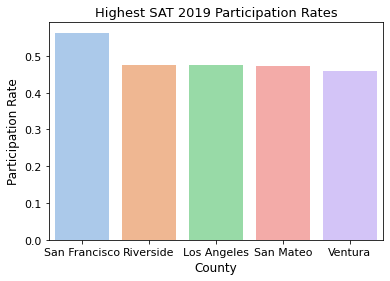

In [187]:
sns.barplot(data = highest_sat_partrate.head(5),
            x = 'county',
            y = 'participation_rate',
            palette = 'pastel')
plt.title('Highest SAT 2019 Participation Rates', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Participation Rate', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('highest2019satparticipationbycounty.png')

n: The above image shows the counties in Califonia with the highest SAT participation rates in 2019.

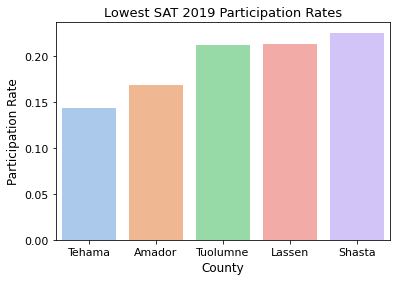

In [188]:
sns.barplot(data = lowest_sat_partrate.head(5),
            x = 'county',
            y = 'participation_rate',
            palette = 'pastel')
plt.title('Lowest SAT 2019 Participation Rates', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Participation Rate', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('lowest2019satparticipationbycounty.png')

n: The above image shows the counties in Califonia with the lowest SAT participation rates in 2019.

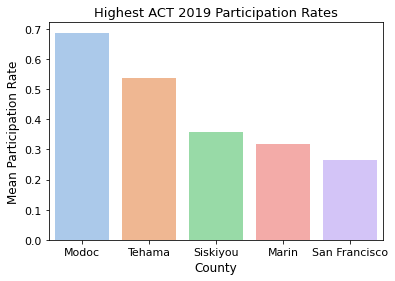

In [189]:
sns.barplot(data = highest_act_partrate.head(5),
            x = 'county',
            y = 'participation_rate',
            palette = 'pastel')
plt.title('Highest ACT 2019 Participation Rates', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Mean Participation Rate', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('highest2019actparticipationbycounty.png')

n: The above image shows the counties with the highest ACT participation rates in 2019.

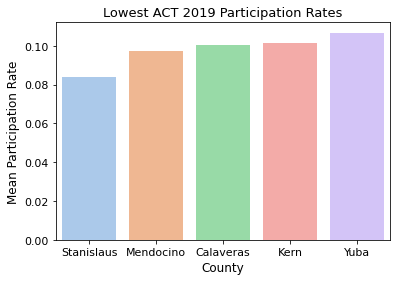

In [190]:
sns.barplot(data = lowest_act_partrate.head(5),
            x = 'county',
            y = 'participation_rate',
            palette = 'pastel')
plt.title('Lowest ACT 2019 Participation Rates', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Mean Participation Rate', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('lowest2019actparticipationbycounty.png')

n: The above image shows the counties with the lowest ACT participation rates in 2019.

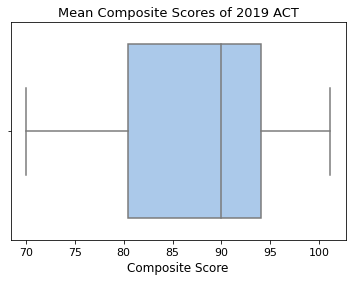

In [191]:
sns.boxplot(act_composite_rate['composite_score'], palette = 'pastel')
plt.title('Mean Composite Scores of 2019 ACT', fontsize = 13)
plt.xlabel('Composite Score', fontsize = 12)
plt.xticks(fontsize= 11);
plt.savefig('meancomposite2019.png')

n: The above image represents the range and distribution of mean composite scores of the 2019 ACT in California.

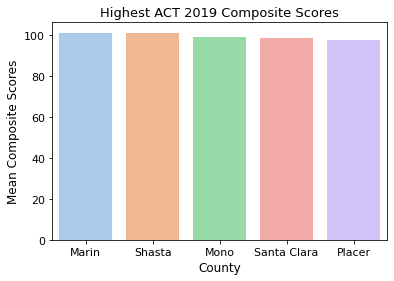

In [192]:
sns.barplot(data = highest_act_composite_score.head(5),
            x = 'county',
            y = 'composite_score',
            palette = 'pastel')
plt.title('Highest ACT 2019 Composite Scores', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Mean Composite Scores', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('highest2019actcompositescores.png')

n: The above image represents the highest 2019 ACT composite scores by county in California. 

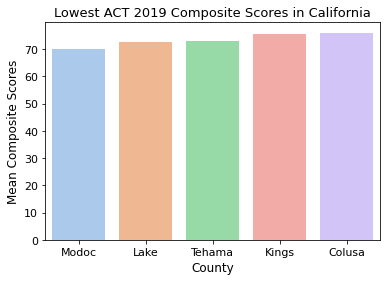

In [193]:
sns.barplot(data = lowest_act_composite_score.head(5),
            x = 'county',
            y = 'composite_score',
            palette = 'pastel')
plt.title('Lowest ACT 2019 Composite Scores in California', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Mean Composite Scores', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('lowest2019actcompositescorescali.png')

n: The above image represents the lowest 2019 ACT composite scores by county in California. 

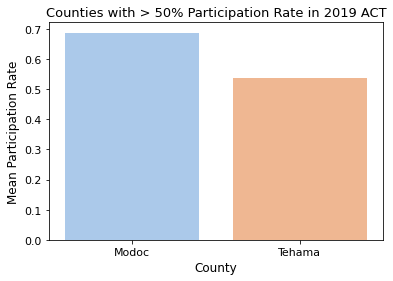

In [194]:
sns.barplot(data = act50,
            x = 'county',
            y = 'participation_rate', palette='pastel');
plt.title('Counties with > 50% Participation Rate in 2019 ACT', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Mean Participation Rate', fontsize = 12)
plt.xticks(fontsize= 11)
plt.yticks(fontsize= 11);
plt.savefig('over50partratecounties2019act.png')

n: The above image represents the counties in California with over a 50% participation rate in the 2019 ACT.

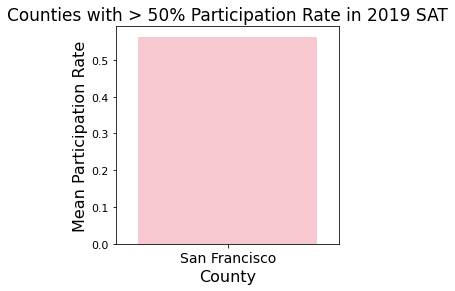

In [195]:
plt.figure(figsize=(4,4))
sns.barplot(data = sat50,
            x = 'county',
            y = 'participation_rate',
           color = 'pink')
plt.title('Counties with > 50% Participation Rate in 2019 SAT', fontsize = 17)
plt.xlabel('County', fontsize = 16)
plt.ylabel('Mean Participation Rate', fontsize = 16)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 11);
plt.savefig('over50partratecounties2019sat.png')

n: The above image represents the counties in California with over a 50% participation rate in the 2019 SAT.

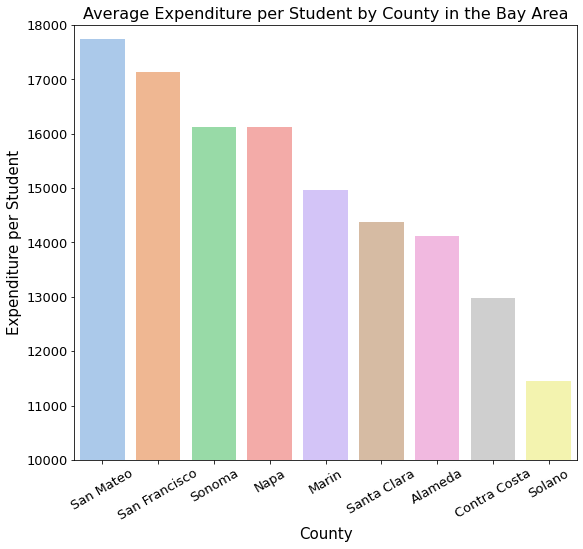

In [196]:
plt.figure(figsize=(9,8))
sns.barplot(data=most_bay_area_expenditure,x='county',y='expenditure_per_student', palette='pastel')
plt.title('Average Expenditure per Student by County in the Bay Area', fontsize = 16)
plt.xlabel('County', fontsize = 15)
plt.ylabel('Expenditure per Student', fontsize = 15)
plt.xticks(fontsize= 13, rotation=30)
plt.yticks(fontsize= 13)
plt.ylim(10000, 18000);
plt.savefig('avgexpendperstudentbycountybayarea.png')

n: The above image represents the average expenditure per student by the government in each of the nine Bay Area counties.

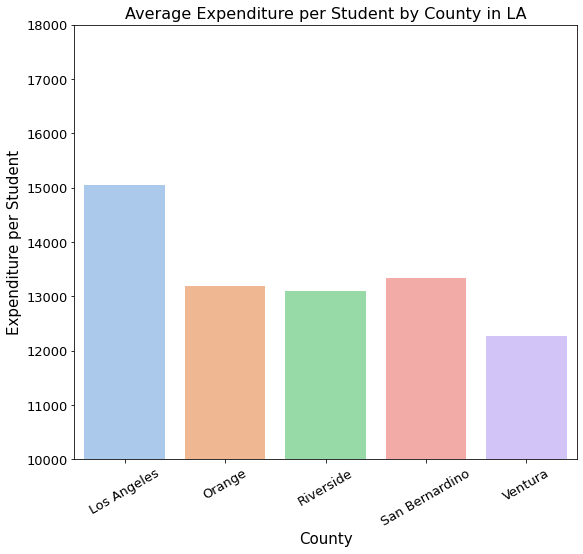

In [197]:
plt.figure(figsize=(9,8))
sns.barplot(data=la_expenditure,x='county',y='expenditure_per_student', palette='pastel')
plt.title('Average Expenditure per Student by County in LA', fontsize = 16)
plt.xlabel('County', fontsize = 15)
plt.ylabel('Expenditure per Student', fontsize = 15)
plt.xticks(fontsize= 13, rotation=30)
plt.yticks(fontsize= 13)
plt.ylim(10000, 18000);
plt.savefig('avgexpendperstudentbycountyla.png')

n: The above image represents the average expenditure per student by the government in each of the five counties in LA.

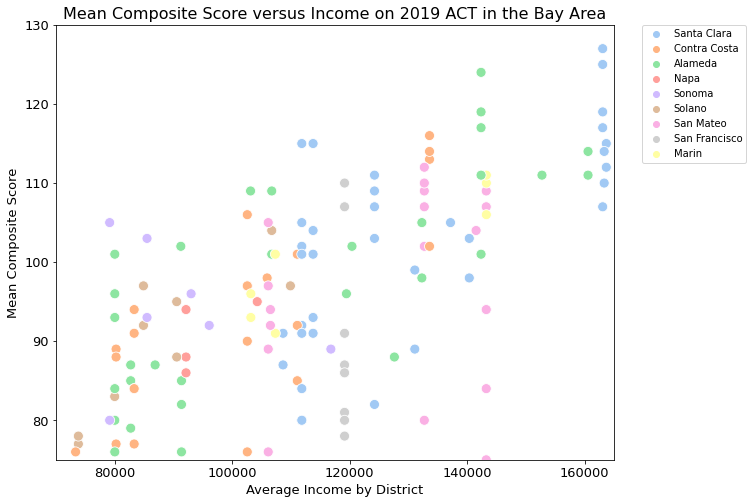

In [198]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bay_area_act_counties,x='income_by_district',y='composite_score', hue = 'county',palette='pastel', s=100)
plt.title('Mean Composite Score versus Income on 2019 ACT in the Bay Area', fontsize = 16)
plt.xlabel('Average Income by District', fontsize = 13)
plt.ylabel('Mean Composite Score', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13)
plt.xlim(70_000, 165_000)
plt.ylim(75,130)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig('meancompscorevsincome2019actbayarea.png')

n: The above image represents the relationship between the mean  composite scores per household income by district on the 2019 ACT in the Bay Area.

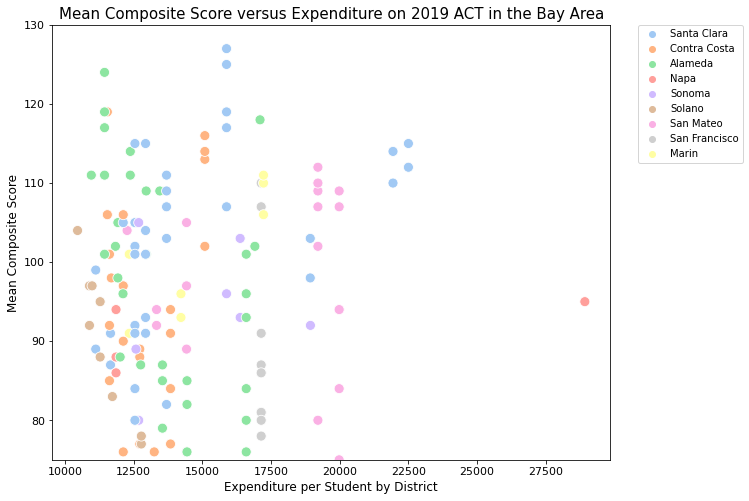

In [199]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bay_area_act_counties,x='expenditure_per_student',y='composite_score', hue = 'county',palette='pastel', s=100)
plt.title('Mean Composite Score versus Expenditure on 2019 ACT in the Bay Area', fontsize = 15)
plt.xlabel('Expenditure per Student by District', fontsize = 12)
plt.ylabel('Mean Composite Score', fontsize = 12)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11);
# plt.xlim(0, 2)
plt.ylim(75,130)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig('meancompscorevsexpenditure2019actbayarea.png')

n: The above image represents the relationship between the mean  composite scores and expenditure per student by the district on the 2019 ACT in the Bay Area.

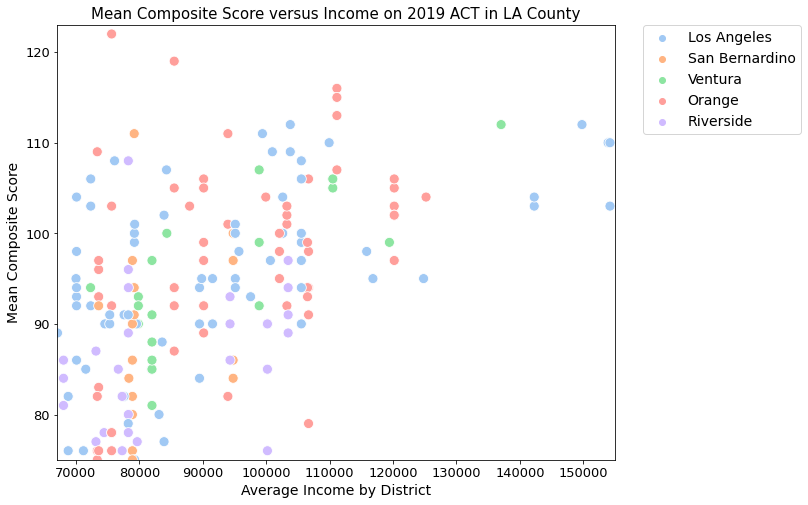

In [200]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=la_act_counties,x='income_by_district',y='composite_score', hue = 'county',palette='pastel', s=100)
plt.title('Mean Composite Score versus Income on 2019 ACT in LA County', fontsize = 15)
plt.xlabel('Average Income by District', fontsize = 14)
plt.ylabel('Mean Composite Score', fontsize = 14)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13);
plt.xlim(67_000, 155_000)
plt.ylim(75,123)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14);
plt.savefig('meancompscorevsincome2019actla.png')

n: The above image represents the relationship between the mean  composite scores and the income per student by the district on the 2019 ACT in LA.

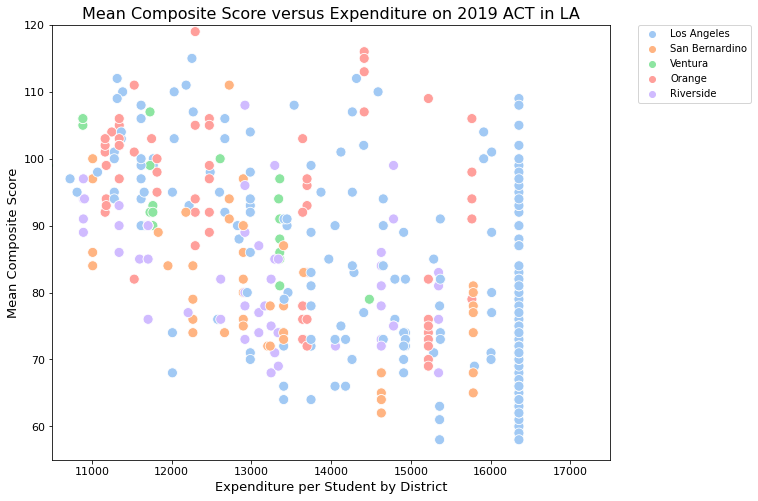

In [201]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=la_act_counties,x='expenditure_per_student',y='composite_score', hue = 'county',palette='pastel', s=100)
plt.title('Mean Composite Score versus Expenditure on 2019 ACT in LA', fontsize = 16)
plt.xlabel('Expenditure per Student by District', fontsize = 13)
plt.ylabel('Mean Composite Score', fontsize = 13)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11);
plt.xlim(10_500,17_500)
plt.ylim(55,120)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig('meancompscorevsexpend2019actla.png')

n: The above image represents the relationship between the mean  composite scores and the expenditure per student by the district on the 2019 ACT in LA.

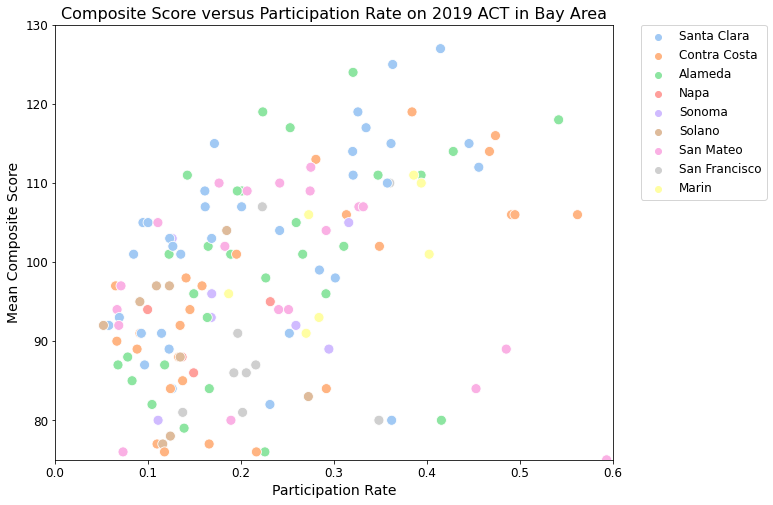

In [202]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bay_area_act_counties,x='participation_rate',y='composite_score', hue = 'county',palette='pastel', s=100)
plt.title('Composite Score versus Participation Rate on 2019 ACT in Bay Area', fontsize = 16)
plt.xlabel('Participation Rate', fontsize = 14)
plt.ylabel('Mean Composite Score', fontsize = 14)
plt.xticks(fontsize= 12, rotation=0)
plt.yticks(fontsize= 12);
plt.xlim(0,.6)
plt.ylim(75,130)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12);
plt.savefig('meancompvspartrate2019actbayarea.png')

n: The above image represents the relationship between the mean  composite scores and the participation rate by the district on the 2019 ACT in the Bay Area.

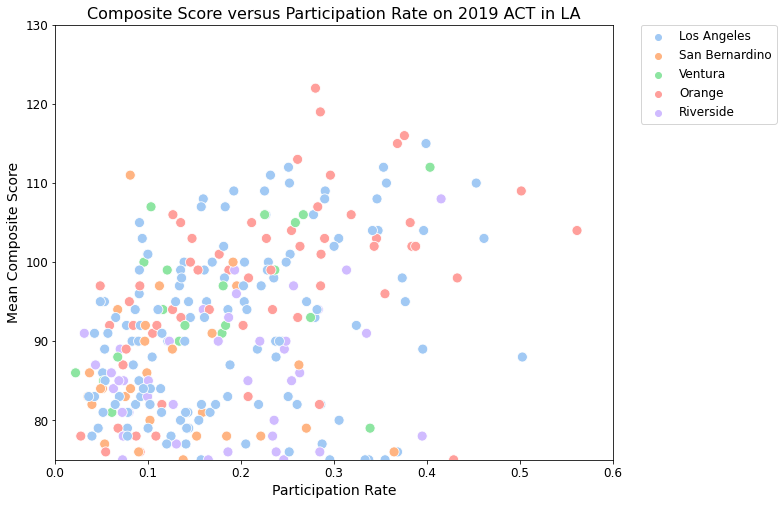

In [203]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=la_act_counties,x='participation_rate',y='composite_score', hue = 'county',palette='pastel', s=100)
plt.title('Composite Score versus Participation Rate on 2019 ACT in LA', fontsize = 16)
plt.xlabel('Participation Rate', fontsize = 14)
plt.ylabel('Mean Composite Score', fontsize = 14)
plt.xticks(fontsize= 12, rotation=0)
plt.yticks(fontsize= 12);
plt.xlim(0,.6)
plt.ylim(75,130)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12);
plt.savefig('meancompvspartrate2019actlaaa.png')

n: The above image represents the relationship between the mean composite scores and the participation rate per student by the district on the 2019 ACT in LA.

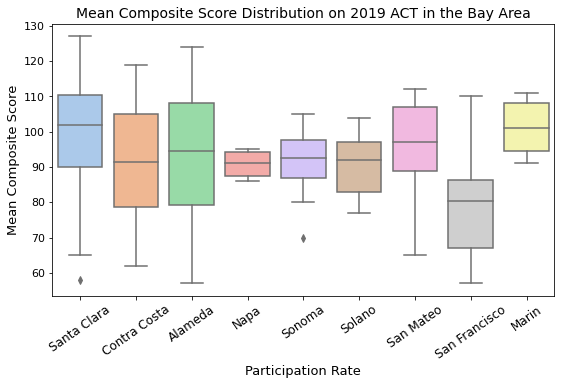

In [204]:
plt.figure(figsize=(9,5))
sns.boxplot(data=bay_area_act_counties, x='county', y='composite_score', palette = 'pastel')
plt.title('Mean Composite Score Distribution on 2019 ACT in the Bay Area', fontsize = 14)
plt.xlabel('Participation Rate', fontsize = 13)
plt.ylabel('Mean Composite Score', fontsize = 13)
plt.xticks(fontsize= 12, rotation=35)
plt.yticks(fontsize= 11);
plt.savefig('compdis2019actbayarea.png')

n: The above image represents the ditribution of mean  composite scores on the 2019 ACT in the Bay Area.

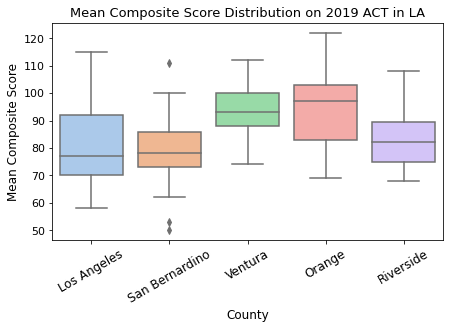

In [205]:
plt.figure(figsize=(7,4))
sns.boxplot(data=la_act_counties, x='county', y='composite_score', palette = 'pastel')
plt.title('Mean Composite Score Distribution on 2019 ACT in LA', fontsize = 13)
plt.xlabel('County', fontsize = 12)
plt.ylabel('Mean Composite Score', fontsize = 12)
plt.xticks(fontsize= 12, rotation=0)
plt.xticks(fontsize= 12, rotation=30)
plt.yticks(fontsize= 11);
plt.savefig('compdist2019actla.png')

n: The above image represents the ditribution of mean composite scores on the 2019 ACT in LA.

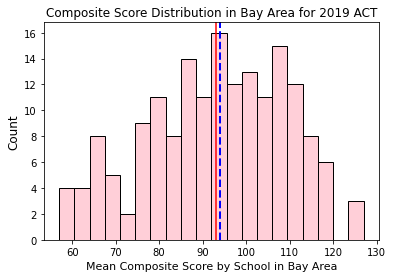

In [206]:
sns.histplot(bay_area_act_counties['composite_score'], bins = 20, color = 'pink');
plt.axvline(x=bay_area_act_counties.composite_score.median(),
            color='blue',
            ls='--', 
            lw=2)
plt.axvline(x=bay_area_act_counties.composite_score.mean(),
            color='red')
plt.title('Composite Score Distribution in Bay Area for 2019 ACT', fontsize = 12)
plt.xlabel('Mean Composite Score by School in Bay Area', fontsize = 11)
plt.ylabel('Count', fontsize=12);
plt.savefig('pinkcompdisthistbay2019act.png')

n: The above image represents the ditribution of mean composite scores on the 2019 ACT in the Bay Area.  The mean of this distribution is represented by the red line and the median by the blue dashed line.

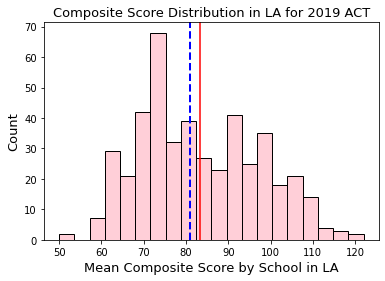

In [207]:
sns.histplot(la_act_counties['composite_score'], bins = 20, color = 'pink')
plt.axvline(x=la_act_counties.composite_score.median(),
            color='blue',
            ls='--', 
            lw=2)
plt.axvline(x=la_act_counties.composite_score.mean(),
            color='red');
plt.title('Composite Score Distribution in LA for 2019 ACT', fontsize = 13)
plt.xlabel('Mean Composite Score by School in LA', fontsize = 13)
plt.ylabel('Count', fontsize=13);
plt.savefig('pinkcompdisthistla2019act.png')

n: The above image represents the ditribution of mean composite scores on the 2019 ACT in the Bay Area.  The mean of this distribution is represented by the red line and the median by the blue dashed line.

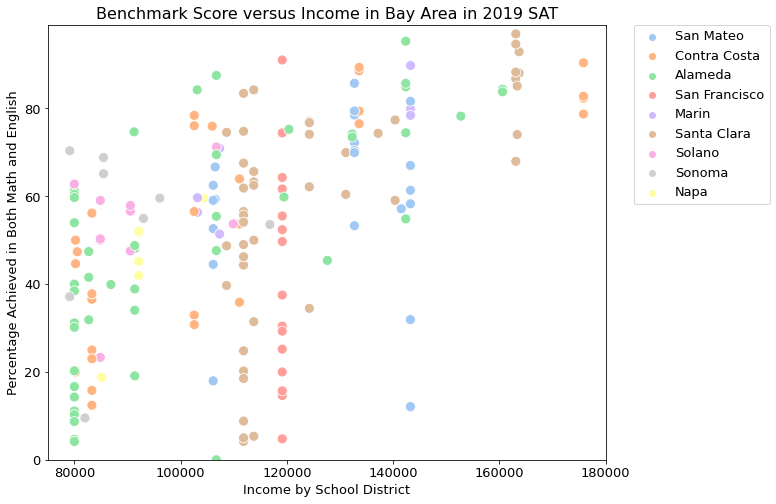

In [208]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=bay_area_sat_counties, x ='income_by_district', y ='pct_sr_bth_bnchmrk', hue = 'county',palette='pastel', s=100)
plt.title('Benchmark Score versus Income in Bay Area in 2019 SAT', fontsize = 16)
plt.xlabel('Income by School District', fontsize = 13)
plt.ylabel('Percentage Achieved in Both Math and English', fontsize = 13)
plt.xticks(fontsize= 13, rotation=0)
plt.yticks(fontsize= 13);
plt.xlim(75_000,180_000)
plt.ylim(0,99)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13);
plt.savefig('bnchvsincbayarea2019sat.png')

n: The above image represents the relationship between the benchmark score and the income by the district on the 2019 SAT in the Bay Area.

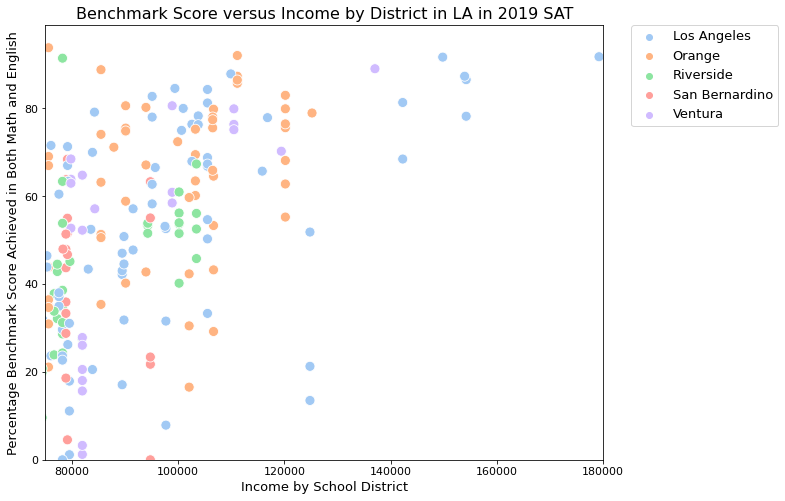

In [209]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=la_sat_counties, x ='income_by_district', y ='pct_sr_bth_bnchmrk', hue = 'county',palette='pastel', s = 100)
plt.title('Benchmark Score versus Income by District in LA in 2019 SAT', fontsize = 16)
plt.xlabel('Income by School District', fontsize = 13)
plt.ylabel('Percentage Benchmark Score Achieved in Both Math and English', fontsize = 13)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11);
plt.xlim(75_000,180_000)
plt.ylim(0,99)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=13);
plt.savefig('bnchvsincla2019sat.png')

n: The above image represents the relationship between the benchmark score and the income by the district on the 2019 SAT in LA.

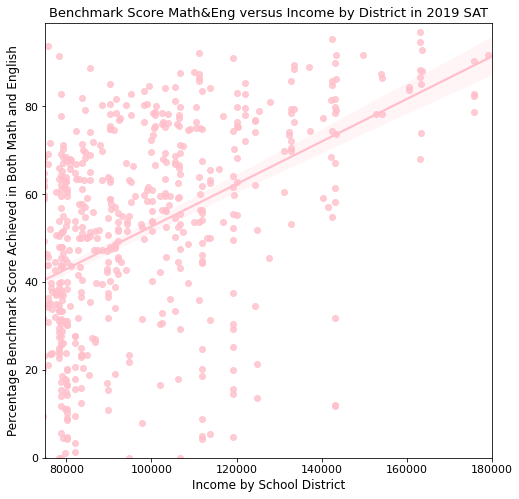

In [210]:
plt.figure(figsize=(8,8))
sns.regplot(data=sat, x ='income_by_district', y ='pct_sr_bth_bnchmrk', color = 'pink')
plt.title('Benchmark Score Math&Eng versus Income by District in 2019 SAT', fontsize = 13)
plt.xlabel('Income by School District', fontsize = 12)
plt.ylabel('Percentage Benchmark Score Achieved in Both Math and English', fontsize = 12)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11)
plt.xlim(75_000,180_000)
plt.ylim(0,99);
plt.savefig('bnchbothvsincomecali2019sat.png')

n: The above image represents the relationship between the benchmark score being achieved in both math and English and the income by the district on the 2019 SAT for all of California.

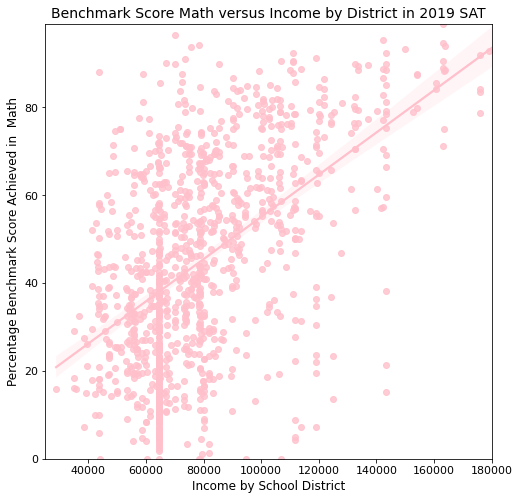

In [211]:
plt.figure(figsize=(8,8))
sns.regplot(data=sat, x ='income_by_district', y ='pct_sr_mth_bnchmrk', color = 'pink')
plt.title('Benchmark Score Math versus Income by District in 2019 SAT', fontsize = 14)
plt.xlabel('Income by School District', fontsize = 12)
plt.ylabel('Percentage Benchmark Score Achieved in  Math', fontsize = 12)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11);
plt.xlim(25_000,180_000)
plt.ylim(0,99);
plt.savefig('bnchmathvsincomecali2019sat.png')

n: The above image represents the relationship between the benchmark score being achieved in math and the income by the district on the 2019 SAT for all of California.

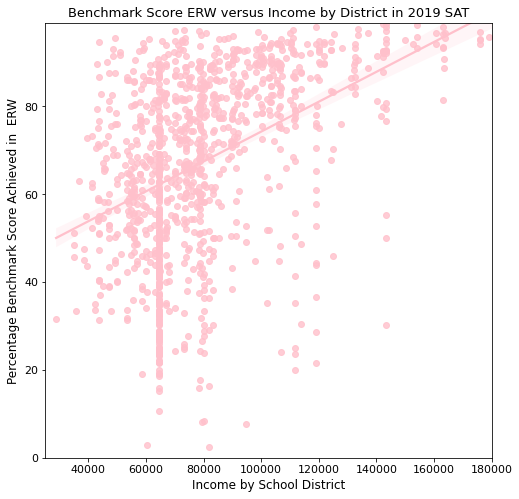

In [212]:
plt.figure(figsize=(8,8))
sns.regplot(data=sat, x ='income_by_district', y ='pct_sr_erw_bnchmrk', color='pink')
plt.title('Benchmark Score ERW versus Income by District in 2019 SAT', fontsize = 13)
plt.xlabel('Income by School District', fontsize = 12)
plt.ylabel('Percentage Benchmark Score Achieved in  ERW', fontsize = 12)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11)
plt.xlim(25_000,180_000)
plt.ylim(0,99);
plt.savefig('bncherwvsincomecali2019sat.png')

n: The above image represents the relationship between the benchmark score being achieved in English and the income by the district on the 2019 SAT for all of California.

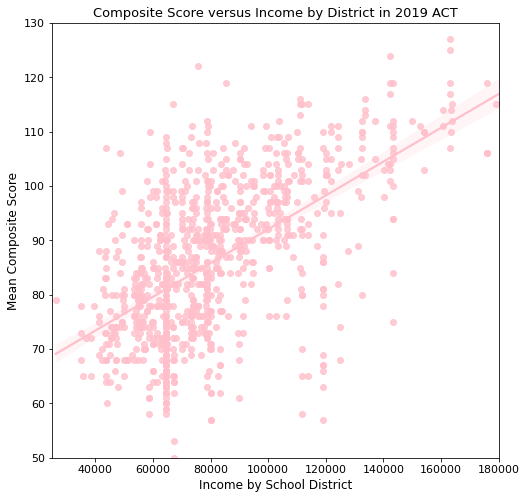

In [213]:
plt.figure(figsize=(8,8))
sns.regplot(data=act, x ='income_by_district', y ='composite_score', color='pink')
plt.title('Composite Score versus Income by District in 2019 ACT', fontsize = 13)
plt.xlabel('Income by School District', fontsize = 12)
plt.ylabel('Mean Composite Score', fontsize = 12)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11)
plt.xlim(25_000,180_000)
plt.ylim(50,130);
plt.savefig('compivsincomecali2019act.png')

n: The above image represents the relationship between the omposite score being achieved and the income by the district on the 2019 ACT for all of California.

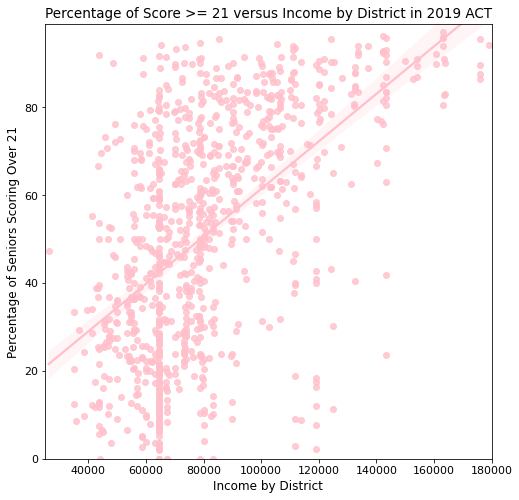

In [214]:
plt.figure(figsize=(8,8))
sns.regplot(data=act, x ='income_by_district', y ='pct_ge21', color = 'pink')
plt.title('Percentage of Score >= 21 versus Income by District in 2019 ACT', fontsize = 13.5)
plt.xlabel('Income by District', fontsize = 12)
plt.ylabel('Percentage of Seniors Scoring Over 21', fontsize = 12)
plt.xticks(fontsize= 11, rotation=0)
plt.yticks(fontsize= 11)
plt.xlim(25_000,180_000)
plt.ylim(0,99);
plt.savefig('perc21vsincdist2019act.png')

n: The above image represents the relationship between the percentage of the school who scored a 21 or over and the income by the district on the 2019 ACT for all of California.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

## Brief Summary of Analysis
- Within the Bay Area, Alameda, Contra Costa and Solano counties tend to be the areas with the lowest incomes.  This corresponds with lower scores.
- In LA, it is Riverside and Ventura counties.
- Composite score on the ACT seems to be positively correlated with participation rate within the Bay and LA. 
- Benchmark score on the SAT and Composite Score in ACT in both English and Math seem to be positively correlated with income.

## Recommendations
- If I were to go with the Bay Area, I would choose Solano, Contra Costa or Alameda counties to use the grant money towards.
- For LA, I would choose either Riverside or Ventura counties. 
- Since household income could be a large contributing factor greatest disparity between scores, facilitating peer-to-peer mentorship programs, providing free to low-cost sliding scale college entrance exam prep can help students from underserved communities get the equity they need to succeed. 


Don't forget to create your README!

**To-Do:** *If you combine your problem statement, data dictionary, brief summary of your analysis, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.* Don't forget to cite your data sources!